<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


### Rigid Transformations in Lower Dimensional Space for Subsurface Uncertainty Quantification and Interpretation


#### Midé Mabadeje$^{1}$ (PhD Candidate) & Michael Pyrcz$^{1,2}$ (Professor), University of Texas at Austin

 1. Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

 2. Department of Geological Sciences, Jackson School of Geosciences

### Stabilized Representations in Lower Dimensional Space

Here's a demonstration on how to find the optimal rotation, reflection, and translation for corresponding points in a low dimensional space to help stabilize the projections (2D or 3D) such that the solutions obtained are Euclidean transformation invariant when using multidimensional scaling (MDS) as a dimensionality reduction method applicable to out-of-sample-points (OOSP). This can be further extended and applicable to other nonlinear dimensionality reduction methods and their respective lower dimensional spaces (LDS).


#### Multidimensional Scaling

A powerful ordination method in inferential statistics / information visualization for exploring / visualizing the similarity (conversely the difference) between individual samples from a high dimensional dataset.

* beyond 2 or 3 features it is difficult to visualize the relationship between samples

* for 2 features we can easily visualize the relationships between samples with a scatter plot

* for 3 features we can either visualize in 3D or include color or matrix scatter plots

Multidimensional scaling projects the $m$ dimensional data to $p$ dimensions such that $p << m$.

* ideally we are able to project to $p=2$ to easily explore the relationships between the samples

While principal component analysis (PCA) operates with the covariance matrix, multidimensional scaling operates with the distance / dissimilarity matrix.

* you don't need to know the actual feature values, just the distance or dissimilarity between the samples

* as with any distance in feature space, we consider feature standardization and weighting

* we may also work with a variety of dissimilarity measures


#### Metric Multidimensional Scaling

A generalization of classical multidimensional scaling with a variety of metrics and a loss function optimization.

* formulated as an optimization problem to minimize the square difference between the original and projected pairwise distances

\begin{equation}
min_{x_1,\ldots,x_m} \sum_{i<j} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


General comments about metric multidimensional scaling:

* nonlinear dimensionality reduction

* no distribution assumption

* dissimilarity measure must be meaningful

* dimensionality reduction is performed such that the error in the sample pairwise distance is minimized

* there is a variant known as Non-metric Multidimensional Scaling for ordinal features (categorical with ordering).

#### Checking Multidimensional Scaling Results

The multidimensional scaling approach minimizes the square difference of the pairwise distances between all the data samples and each other between the projected, lower dimensional, and original feature space.

* **stress** is defined as:

\begin{equation}
Stress_P(x_1,\ldots,x_n) = \left( \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2 \right)^{\frac{1}{2}}
\end{equation}


However, the above is the raw stress value, which is not very informative as high values does not necessarily indicate bad fit. A better way of communicating reliability is to calculate a normed stress, e.g. with Stress-1 implemented according to Kruskal (1964) on p. 3 where 0 indicates a perfect fit, 0.025 excellent, 0.05 good, 0.1 fair, and 0.2 poor. For more information see Kruskal (1964) p. 8–9 and Borg (2005) p.41–43


\begin{equation}
Stress_{norm} (x_1,\ldots,x_n) = \left( \dfrac { \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} )^2 \right } \left\sum_{i \ne j = 1,\ldots,n}\left( \delta_{i,j}^2 \right)\right \right)^{\frac{1}{2}}
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


* it is also useful to visualize the scatter plot of projected vs. original pairwise distances

## Rigid Transformations

A rigid transformation also known as isometry or Euclidean transformation is a transformation of the plane that preserves length. Reflections, translations, rotations, and combinations of these three transformations are "rigid transformations".

1. A translation is a transformation which "slides" a figure a fixed distance in a given direction without changing its size or shape, and without turning and flipping it.

2. A rotation is a transformation that turns a figure about a fixed point called the center of rotation. An object and its rotation are the same shape and size, but the figures may be turned in different directions. Rotations may be clockwise or counterclockwise.

3. A reflection can be thought of as folding or "flipping" an object over the line of reflection A point reflection exists when a figure is built around a single point called the center of the figure, or point of reflection.  For every point in the figure, there is another point found directly opposite it on the other side of the center such that the point of reflection becomes the midpoint of the segment joining the point with its image.  Under a point reflection, figures do not change size or shape.

However, in the case of MDS projections from high dimensional datasets to low dimensions these transformations are common place, which need to be corrected for.

## Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3. In the terminal type: pip install geostatspy.
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

### Import Libraries

In [1]:
import numpy as np                        # ndarray for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import seaborn as sns                     # for matrix scatter plots
import RigidTransformation_UQI_OOSP as RT      # imports script consisting of functions to run workflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
get_ipython()

### Set the working directory

I always like to do this so, I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [3]:
%pwd # grab current working directory

'/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Notebooks/Current'

In [4]:
os.chdir('/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Results/High-Dimenisonal')    # set the working directory to results directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

In [5]:
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC']) # set TOC < 0.0 as 0.0, otherwise leave the same
df.head()                             # we could also use this command for a table preview

Well    Por  Perm    AI  Brittle   TOC    VR         Prod
0     1  12.08  2.92  2.80    81.40  1.16  2.31  1695.360819
1     2  12.38  3.53  3.22    46.17  0.89  1.88  3007.096063
2     3  14.02  2.59  4.01    72.80  0.89  2.72  2531.938259
3     4  17.67  6.75  2.63    39.81  1.08  1.88  5288.514854
4     5  17.52  4.57  3.18    10.94  1.51  1.90  2859.469624

This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%)
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships. We will start with basic data visualizations.

<br>

#### Summary Statistics

Let's check the summary statistics of our data.

In [6]:
df.describe().transpose()

count         mean          std         min          25%  \
Well     200.0   100.500000    57.879185    1.000000    50.750000   
Por      200.0    14.991150     2.971176    6.550000    12.912500   
Perm     200.0     4.330750     1.731014    1.130000     3.122500   
AI       200.0     2.968850     0.566885    1.280000     2.547500   
Brittle  200.0    48.161950    14.129455   10.940000    37.755000   
TOC      200.0     0.991950     0.478264    0.000000     0.617500   
VR       200.0     1.964300     0.300827    0.930000     1.770000   
Prod     200.0  3864.407081  1553.277558  839.822063  2686.227611   

                 50%          75%          max  
Well      100.500000   150.250000   200.000000  
Por        15.070000    17.402500    23.550000  
Perm        4.035000     5.287500     9.870000  
AI          2.955000     3.345000     4.630000  
Brittle    49.510000    58.262500    84.330000  
TOC         1.030000     1.350000     2.180000  
VR          1.960000     2.142500     2.870000  
Prod     3604.303506  4752.637555  8590.384044

Summary statistics are a critical first step in data checking. 

* this includes the number of valid (non-null) values for each feature (count removes all np.NaN from the totals for each variable).

* we can see the general behaviours such as central tendency, mean, and dispersion, variance.

* we can identify issue with negative values, extreme values, and values that are outside the range of plausible values for each property. 

* We can also establish the feature ranges for plotting.  We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)          # extract ndarray of data table column
Pormax = np.max(df['Por'].values)          # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

In [7]:
pormin = 6.0; pormax = 24.0; porname = 'Porosity (%)'; portitle = 'Porosity'
AImin = 1.0; AImax = 5.0; AIname = 'Acoustic Impedance (kg/m2s*10^6)'; AItitle = 'Acoustic Impedance'
TOCmin = 0.0; TOCmax = 2.2; TOCname = 'Total Organic Carbon (%)'; TOCtitle = 'Total Organic Carbon'
prodmin = 500.0; prodmax = 9000.0; prodname = 'Normalized Initial Production (MCFPD)'; prodtitle = 'Normalized Initial Production'

Since the data looks to be in pretty good shape from its summary statistics and for brevity we skip outlier detection since synthetic i.e., a toy dataset. Let's look at the distributions with a martix scatter plot.

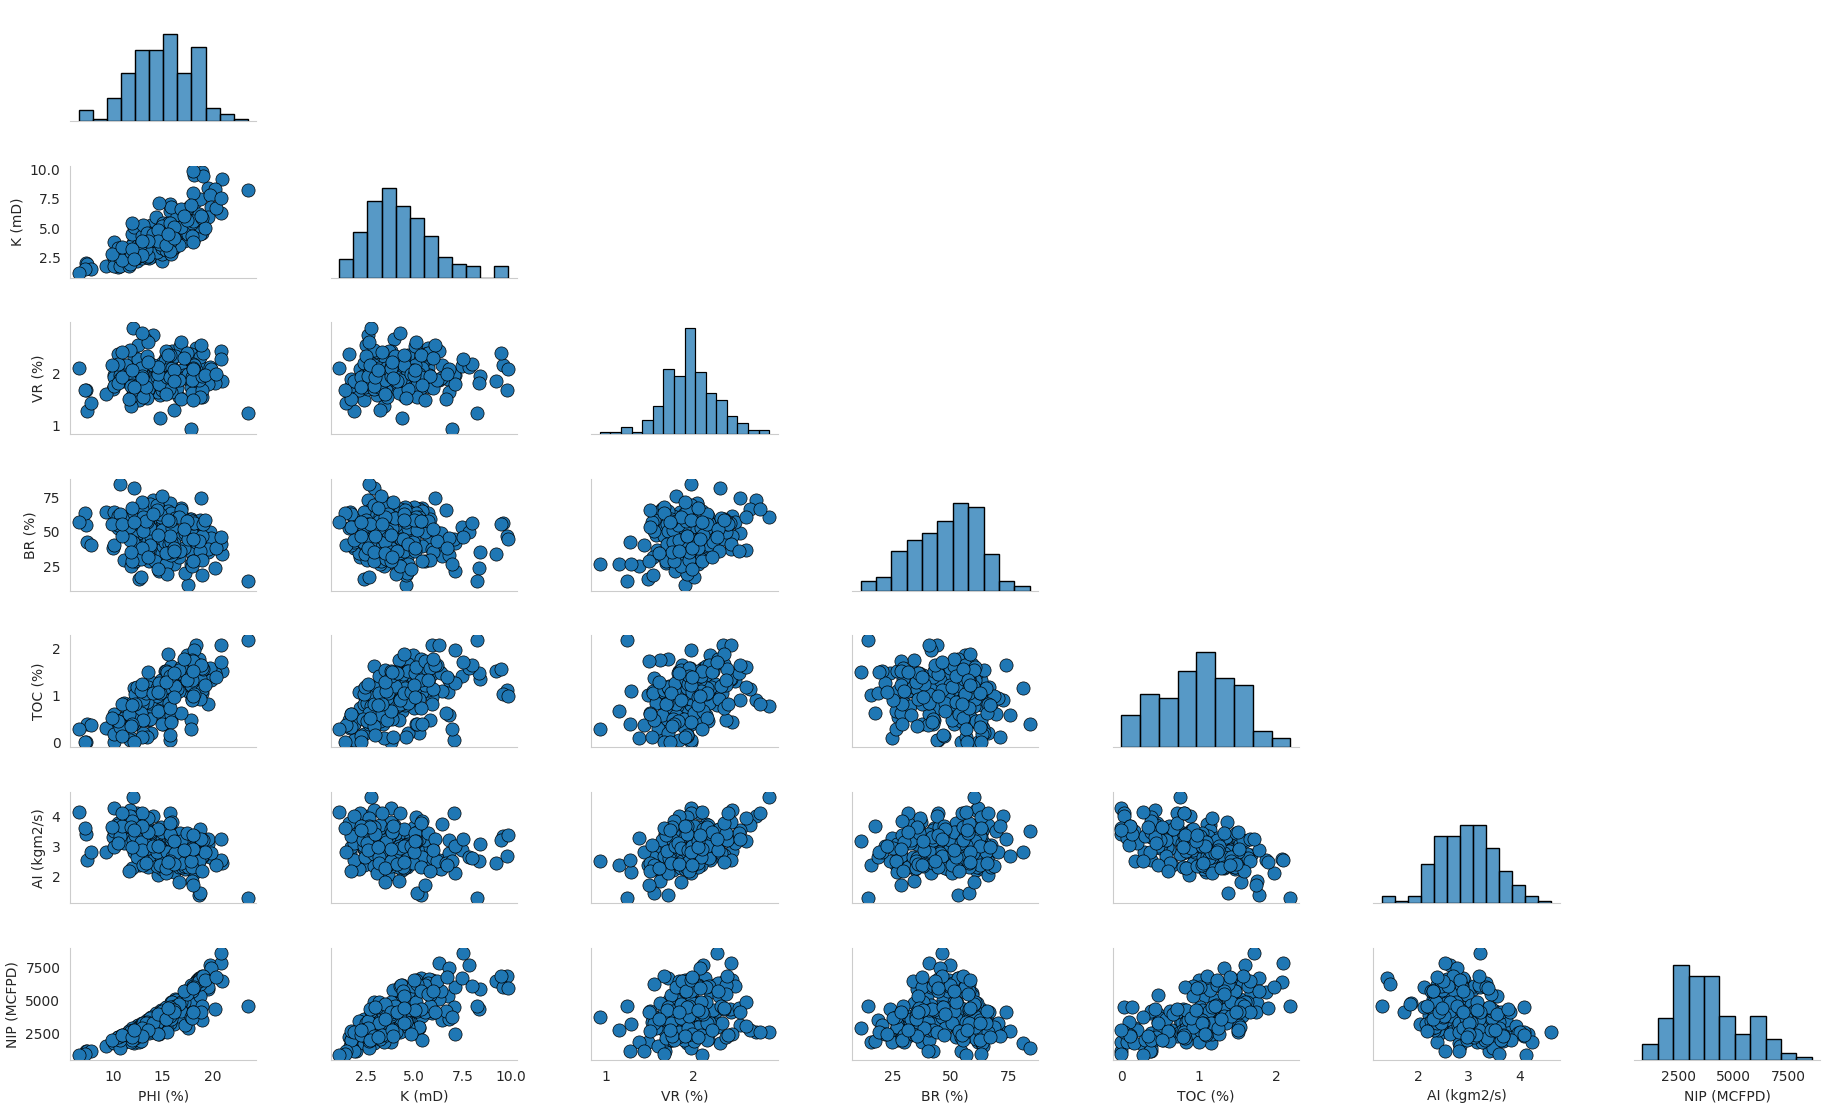

In [8]:
df = df.copy(deep=True)
df.rename(columns={'Por': 'PHI (%)','Perm': 'K (mD)', 'VR': 'VR (%)', 'Brittle': 'BR (%)',
                       'TOC': 'TOC (%)','AI': 'AI (kgm2/s)', 'Prod': 'NIP (MCFPD)'}, inplace=True)

RT.matrix_scatter(df, ['PHI (%)', 'K (mD)', 'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'NIP (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features for entire data', 1, hue_=None, num_OOSP=None, n_case=True, save=True)

In [9]:
## save data frame, it is needed for reruns input
df.to_csv('/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Data/high_dim_to_use.csv', index=False)

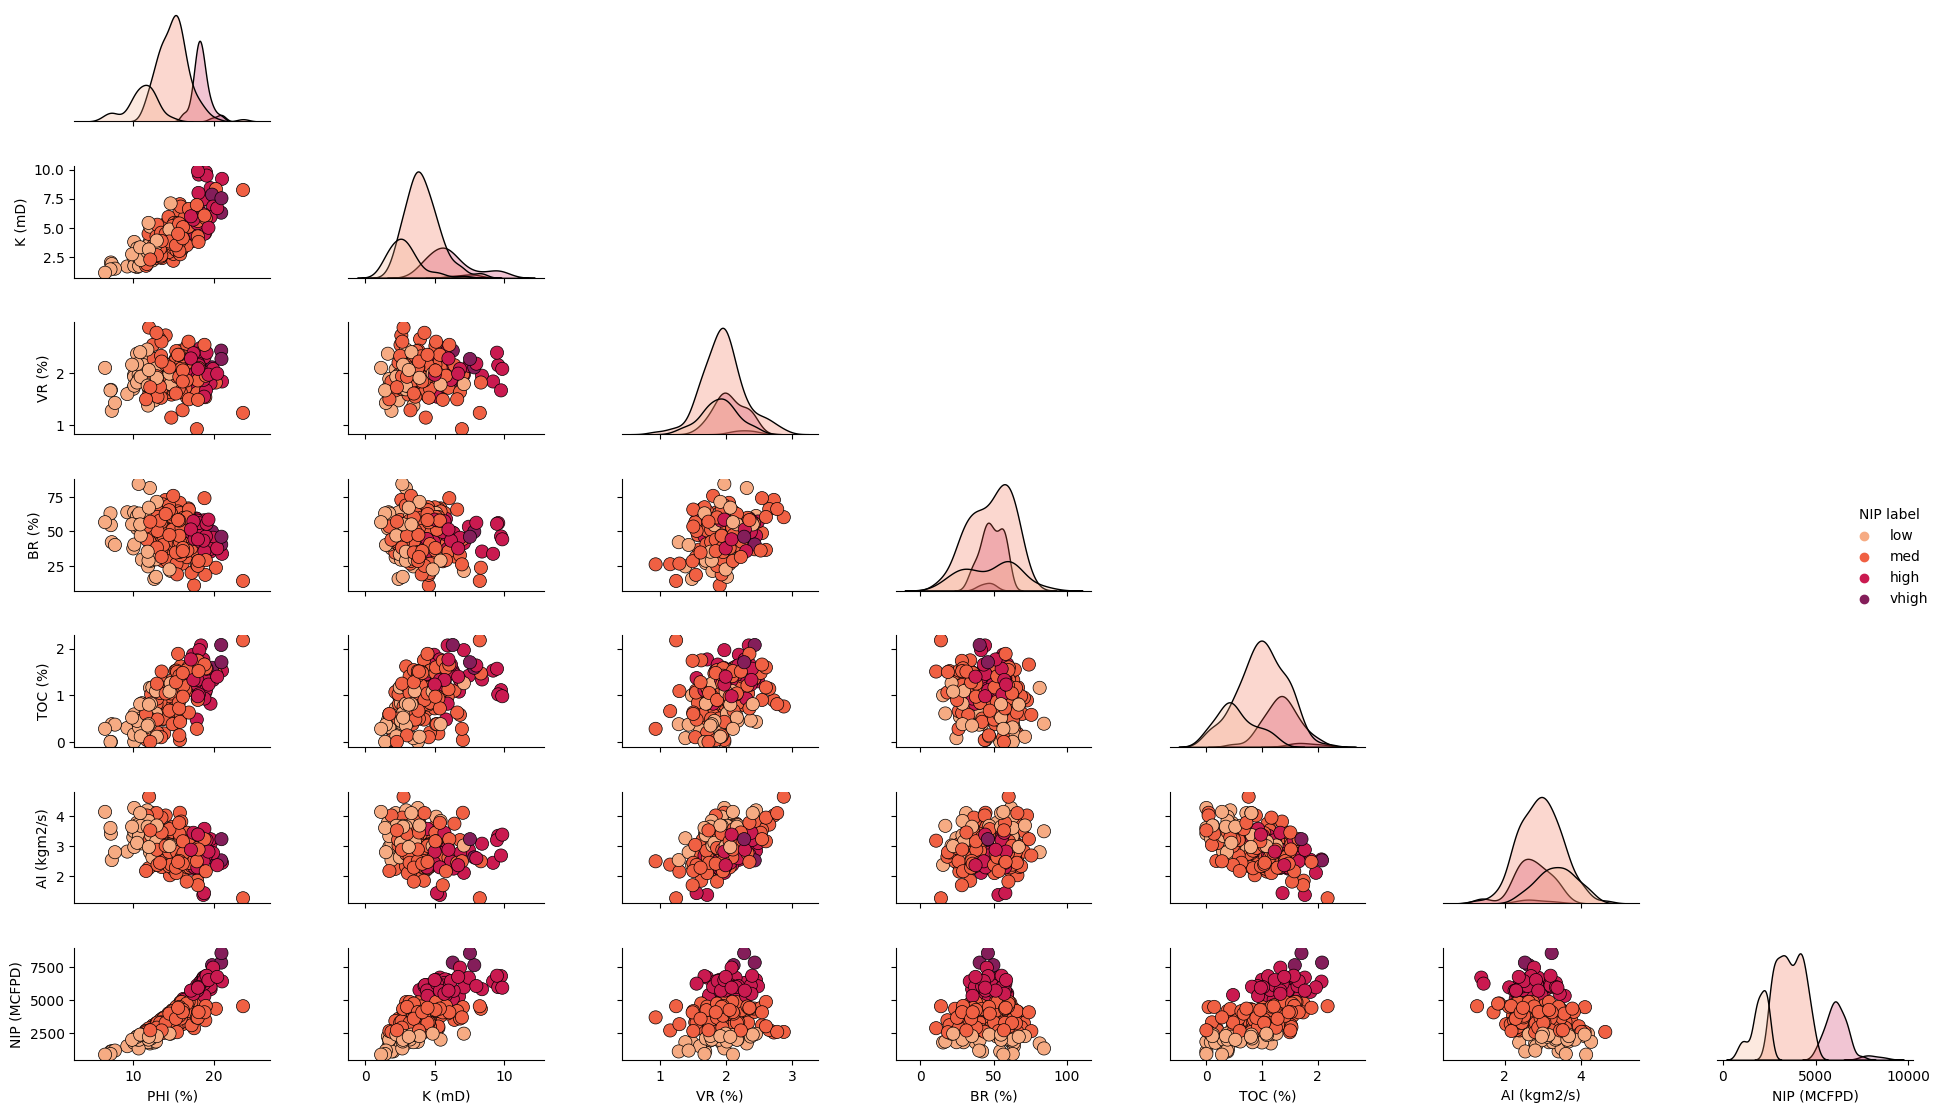

In [10]:
response = 'NIP label'
num_response = 'NIP (MCFPD)'

# Add category for response variable i.e., production levels for complete dataset
df = RT.make_levels(data=df, cat_response=response, num_response=num_response, custom_bins=None)
RT.matrix_scatter(df, ['PHI (%)', 'K (mD)',  'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'NIP (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features coded by production levels for entire dataset', 1, hue_=response, num_OOSP=None, n_case=True, save=True)

Use all 6 predictors as input

In [11]:
# Curate parameters and variables for the proposed workflow i.e., N case
N = 30
num_OOSP= 1  #  number of OOSP's to add
df_subset = df.iloc[:N,1:-1]

# Curate variables for N+1 case by adding a new sample i.e., row to existing dataframe within 95% CI from the dataframe in the N case and obtain random seed used to add the OOSP.
df_subset2, random_seeds_used = RT.make_sample_within_ci(df_subset.copy(), num_OOSP=num_OOSP)

# save random seed used for OOSP generation
np.save('Random seed array for OOSP.npy', random_seeds_used)

# Insert well column index back into data frame for N+1 case
df_subset2.insert(0, 'Well', np.arange(1, len(df_subset2)+1))

# Insert well column index back into data frame for N case
df_subset.insert(0, 'Well', np.arange(1, len(df_subset)+1))

# Select predictor features of interest for proposed workflow
features = ['PHI (%)', 'K (mD)', 'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)']
ns_features = ['NS_PHI (%)', 'NS_K (mD)', 'NS_VR (%)', 'NS_BR (%)', 'NS_TOC (%)', 'NS_AI (kgm2/s)']

#### Data Preparation

Let's make an ordinal feature from the continuous production:

1. low
2. medium
3. high
4. very high

production rates.  This will help us visualize the results as we proceed, we can look at wells with different levels of production projected into a variety of lower dimensional spaces with multidimensional scaling.

<br>

Let's start with the N-samples case

In [12]:
# Dataset for use in N case inclusive of category for response variable i.e., production levels
df_subset = RT.make_levels(data=df_subset, cat_response=response, num_response=num_response, custom_bins=None)
df_subset.head()

Well  PHI (%)  K (mD)  AI (kgm2/s)  BR (%)  TOC (%)  VR (%)  NIP (MCFPD)  \
0     1    12.08    2.92         2.80   81.40     1.16    2.31  1695.360819   
1     2    12.38    3.53         3.22   46.17     0.89    1.88  3007.096063   
2     3    14.02    2.59         4.01   72.80     0.89    2.72  2531.938259   
3     4    17.67    6.75         2.63   39.81     1.08    1.88  5288.514854   
4     5    17.52    4.57         3.18   10.94     1.51    1.90  2859.469624   

  NIP label  
0       low  
1       med  
2       med  
3      high  
4       med

Take a look at the  matrix scatter plot of our 6 predictor features and the production levels for N case samples

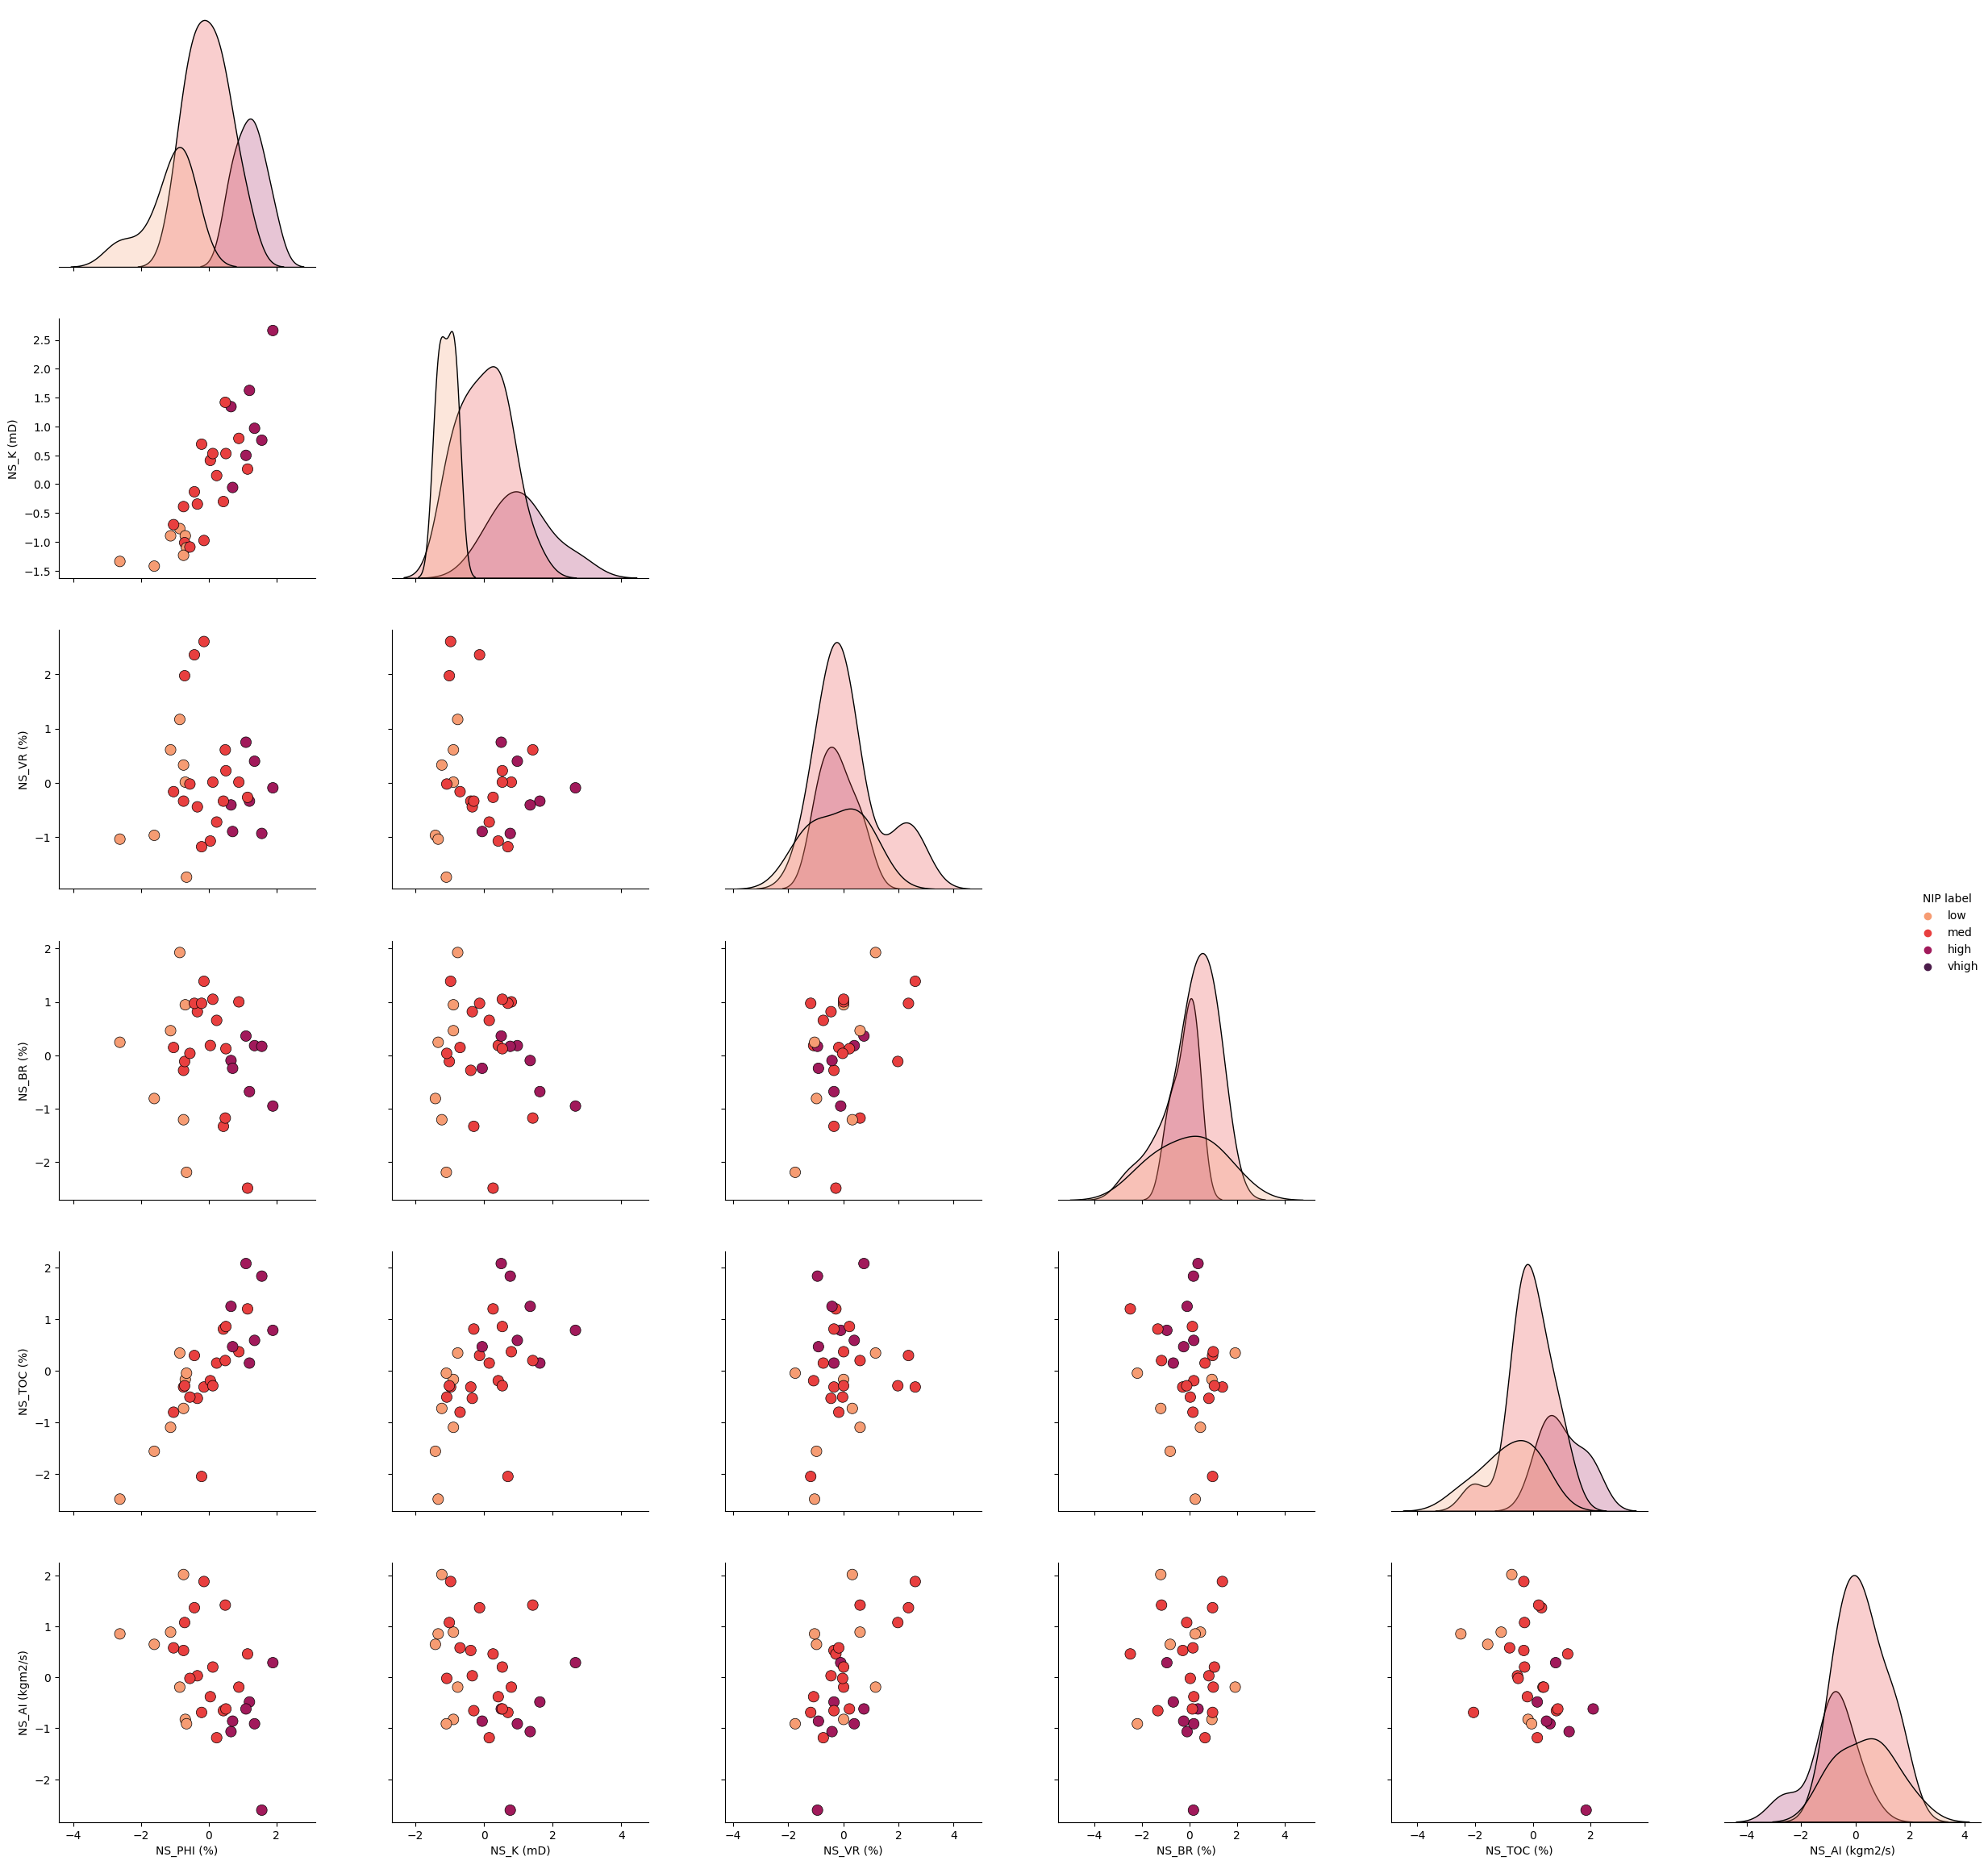

In [13]:
# Visualize the N-case dataset standardized

other_df = RT.standardizer(df_subset, features, keep_only_std_features=False)

# Visualize the matrix scatter plot of the 3 standardized features and the response i.e., production levels.
RT.matrix_scatter(other_df, ns_features, 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of standardized features colored by production levels for N case samples', 1, hue_=response, num_OOSP=None, n_case=True)

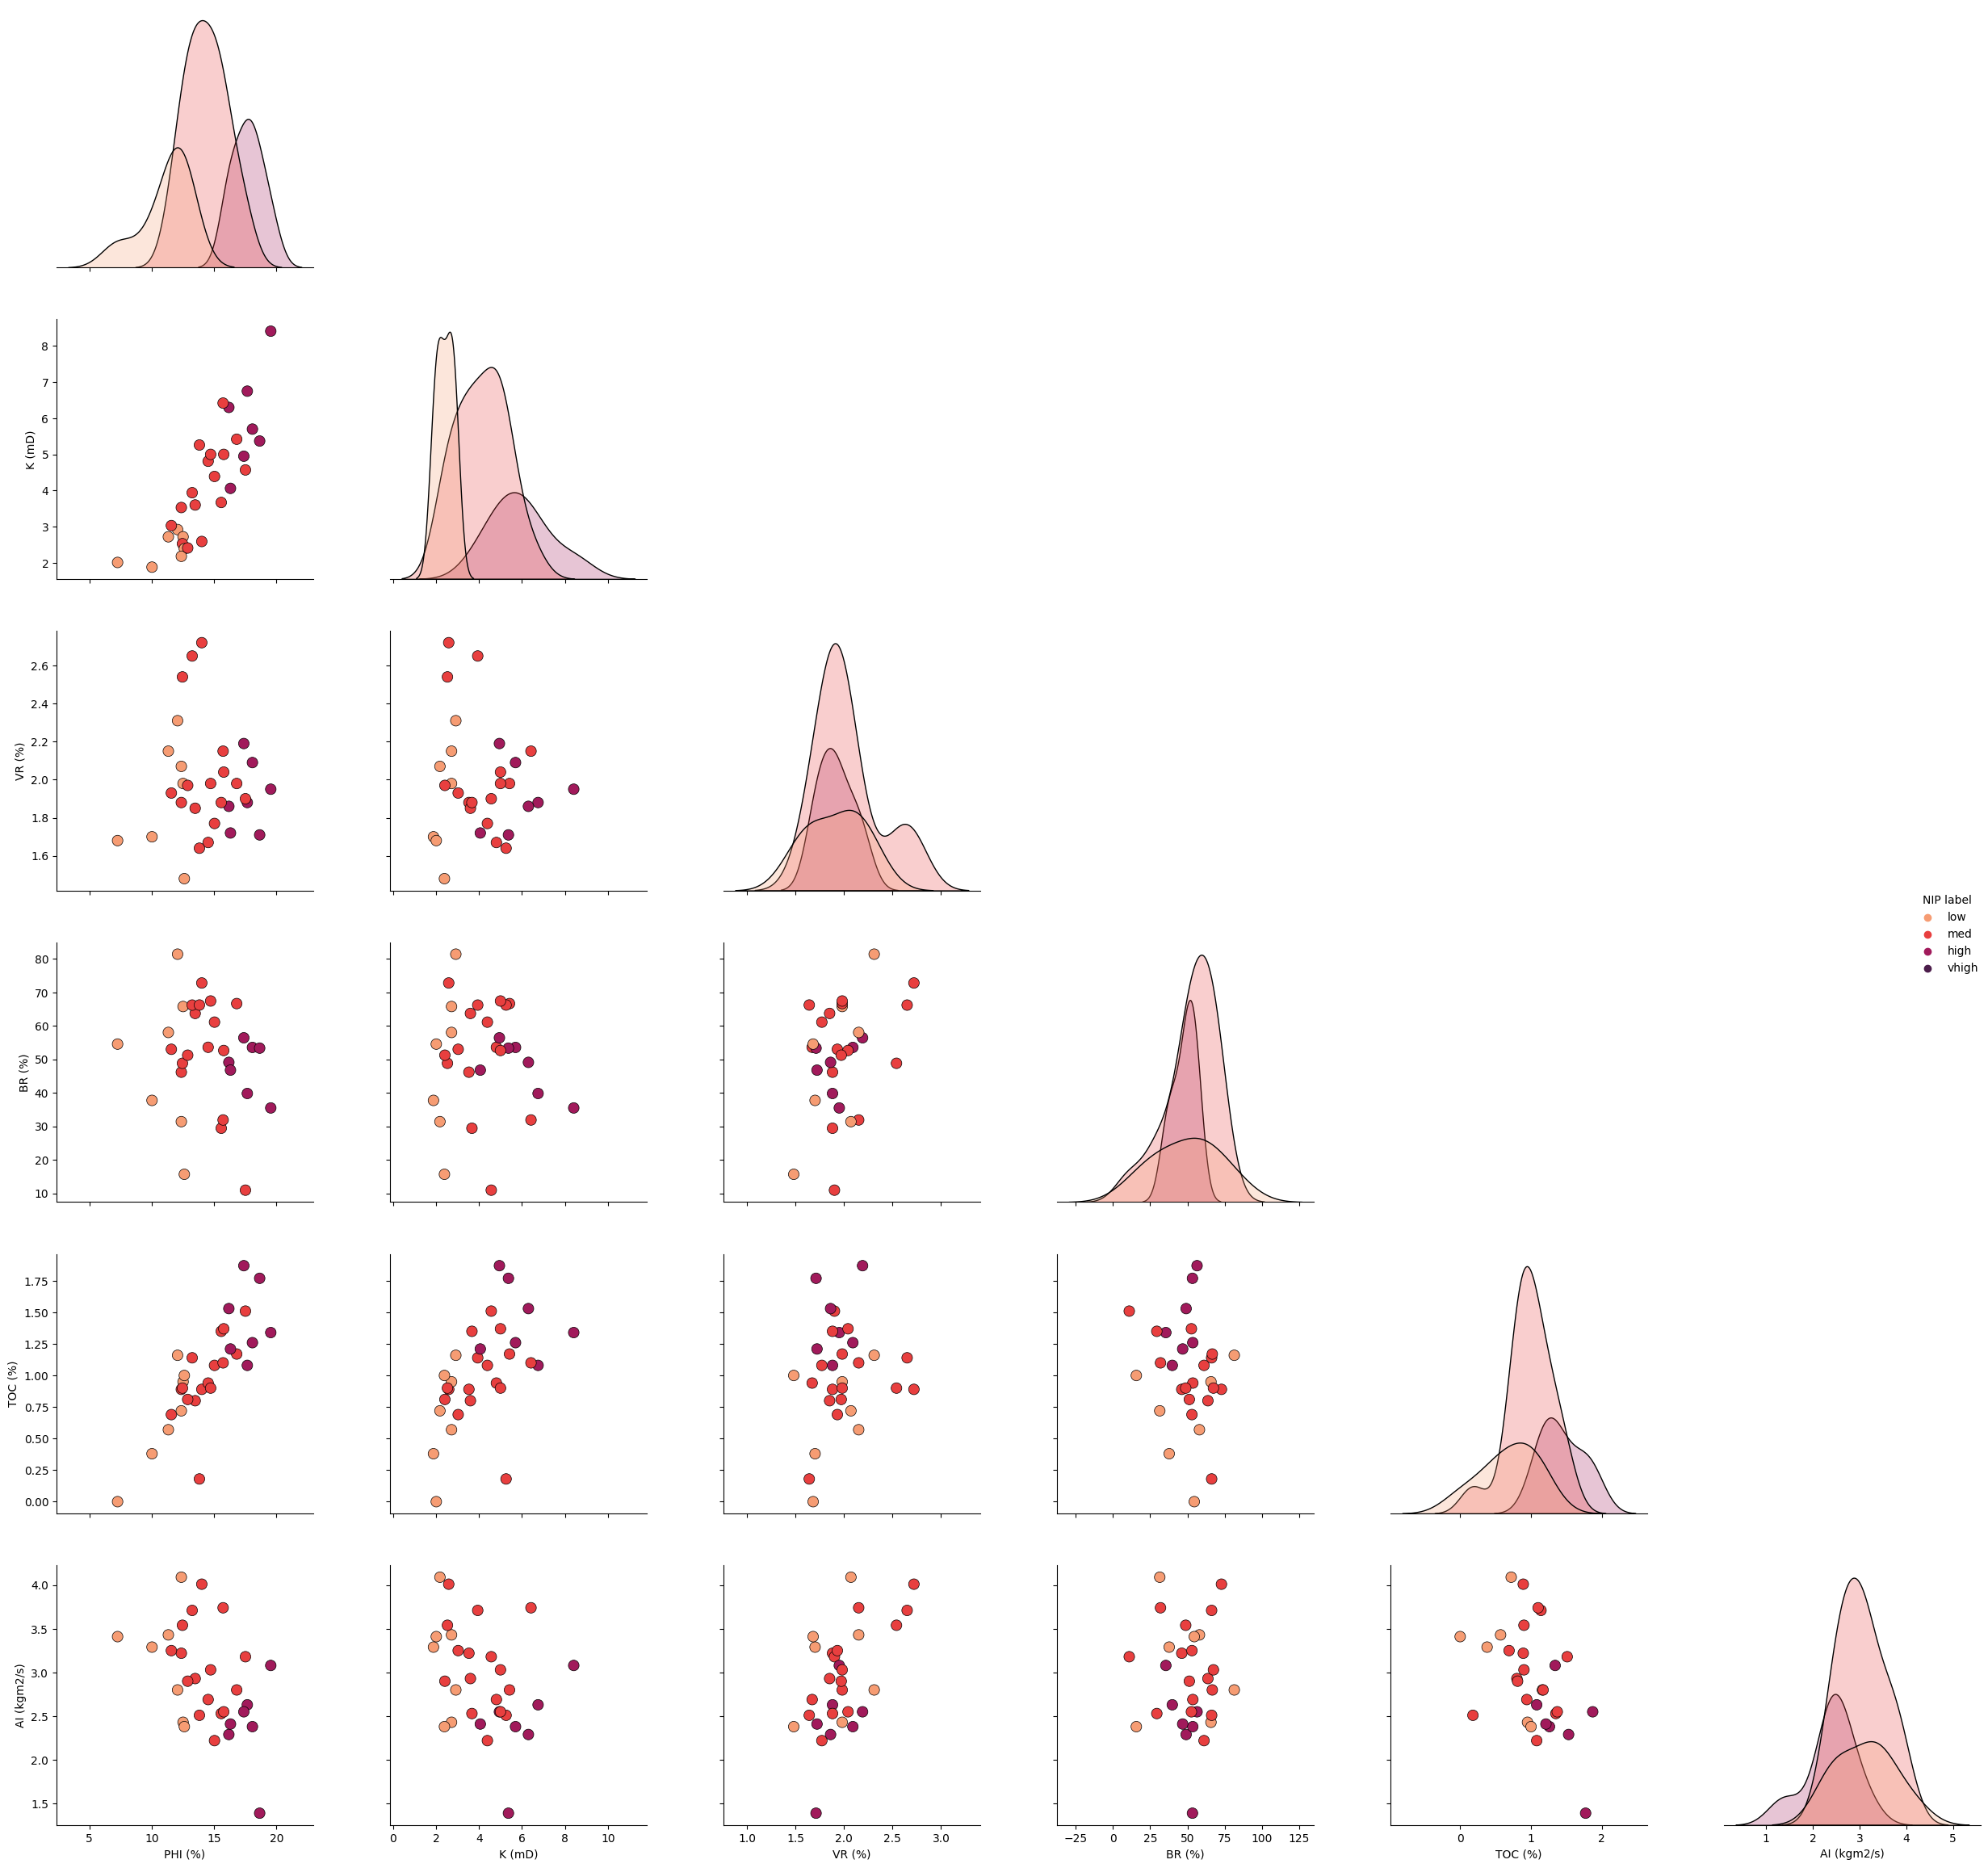

In [14]:
# Visualize the N-case dataset in original feature space

# Visualize the matrix scatter plot of the 3 features chosen and the response i.e., production levels in the original space.
RT.matrix_scatter(other_df, features, 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of features colored by production levels for N case samples', 1, hue_=response, num_OOSP=None, n_case=True)

Similarly, do the same for the N+1 samples case

In [15]:
# Dataset for use in N+1 case inclusive of category for response variable i.e., production levels
df_subset2 = RT.make_levels(data=df_subset2, cat_response=response, num_response=num_response, custom_bins=None)
df_subset2.tail()

Well   PHI (%)   K (mD)  AI (kgm2/s)     BR (%)   TOC (%)    VR (%)  \
26    27  15.78000  5.00000     2.550000  52.640000  1.370000  2.040000   
27    28  15.73000  6.42000     3.740000  31.900000  1.100000  2.150000   
28    29  12.38000  2.18000     4.090000  31.400000  0.720000  2.070000   
29    30  12.89000  2.41000     2.900000  51.240000  0.810000  1.970000   
30    31  14.75813  4.00371     3.069656  47.217618  1.067514  1.933989   

    NIP (MCFPD) NIP label  
26  4778.082354       med  
27  3497.054089       med  
28  2250.406525       low  
29  3244.507305       med  
30  3618.710780       med

Let's take a look at the matrix scatter plot of our 6 features and the production levels for N+1 case samples

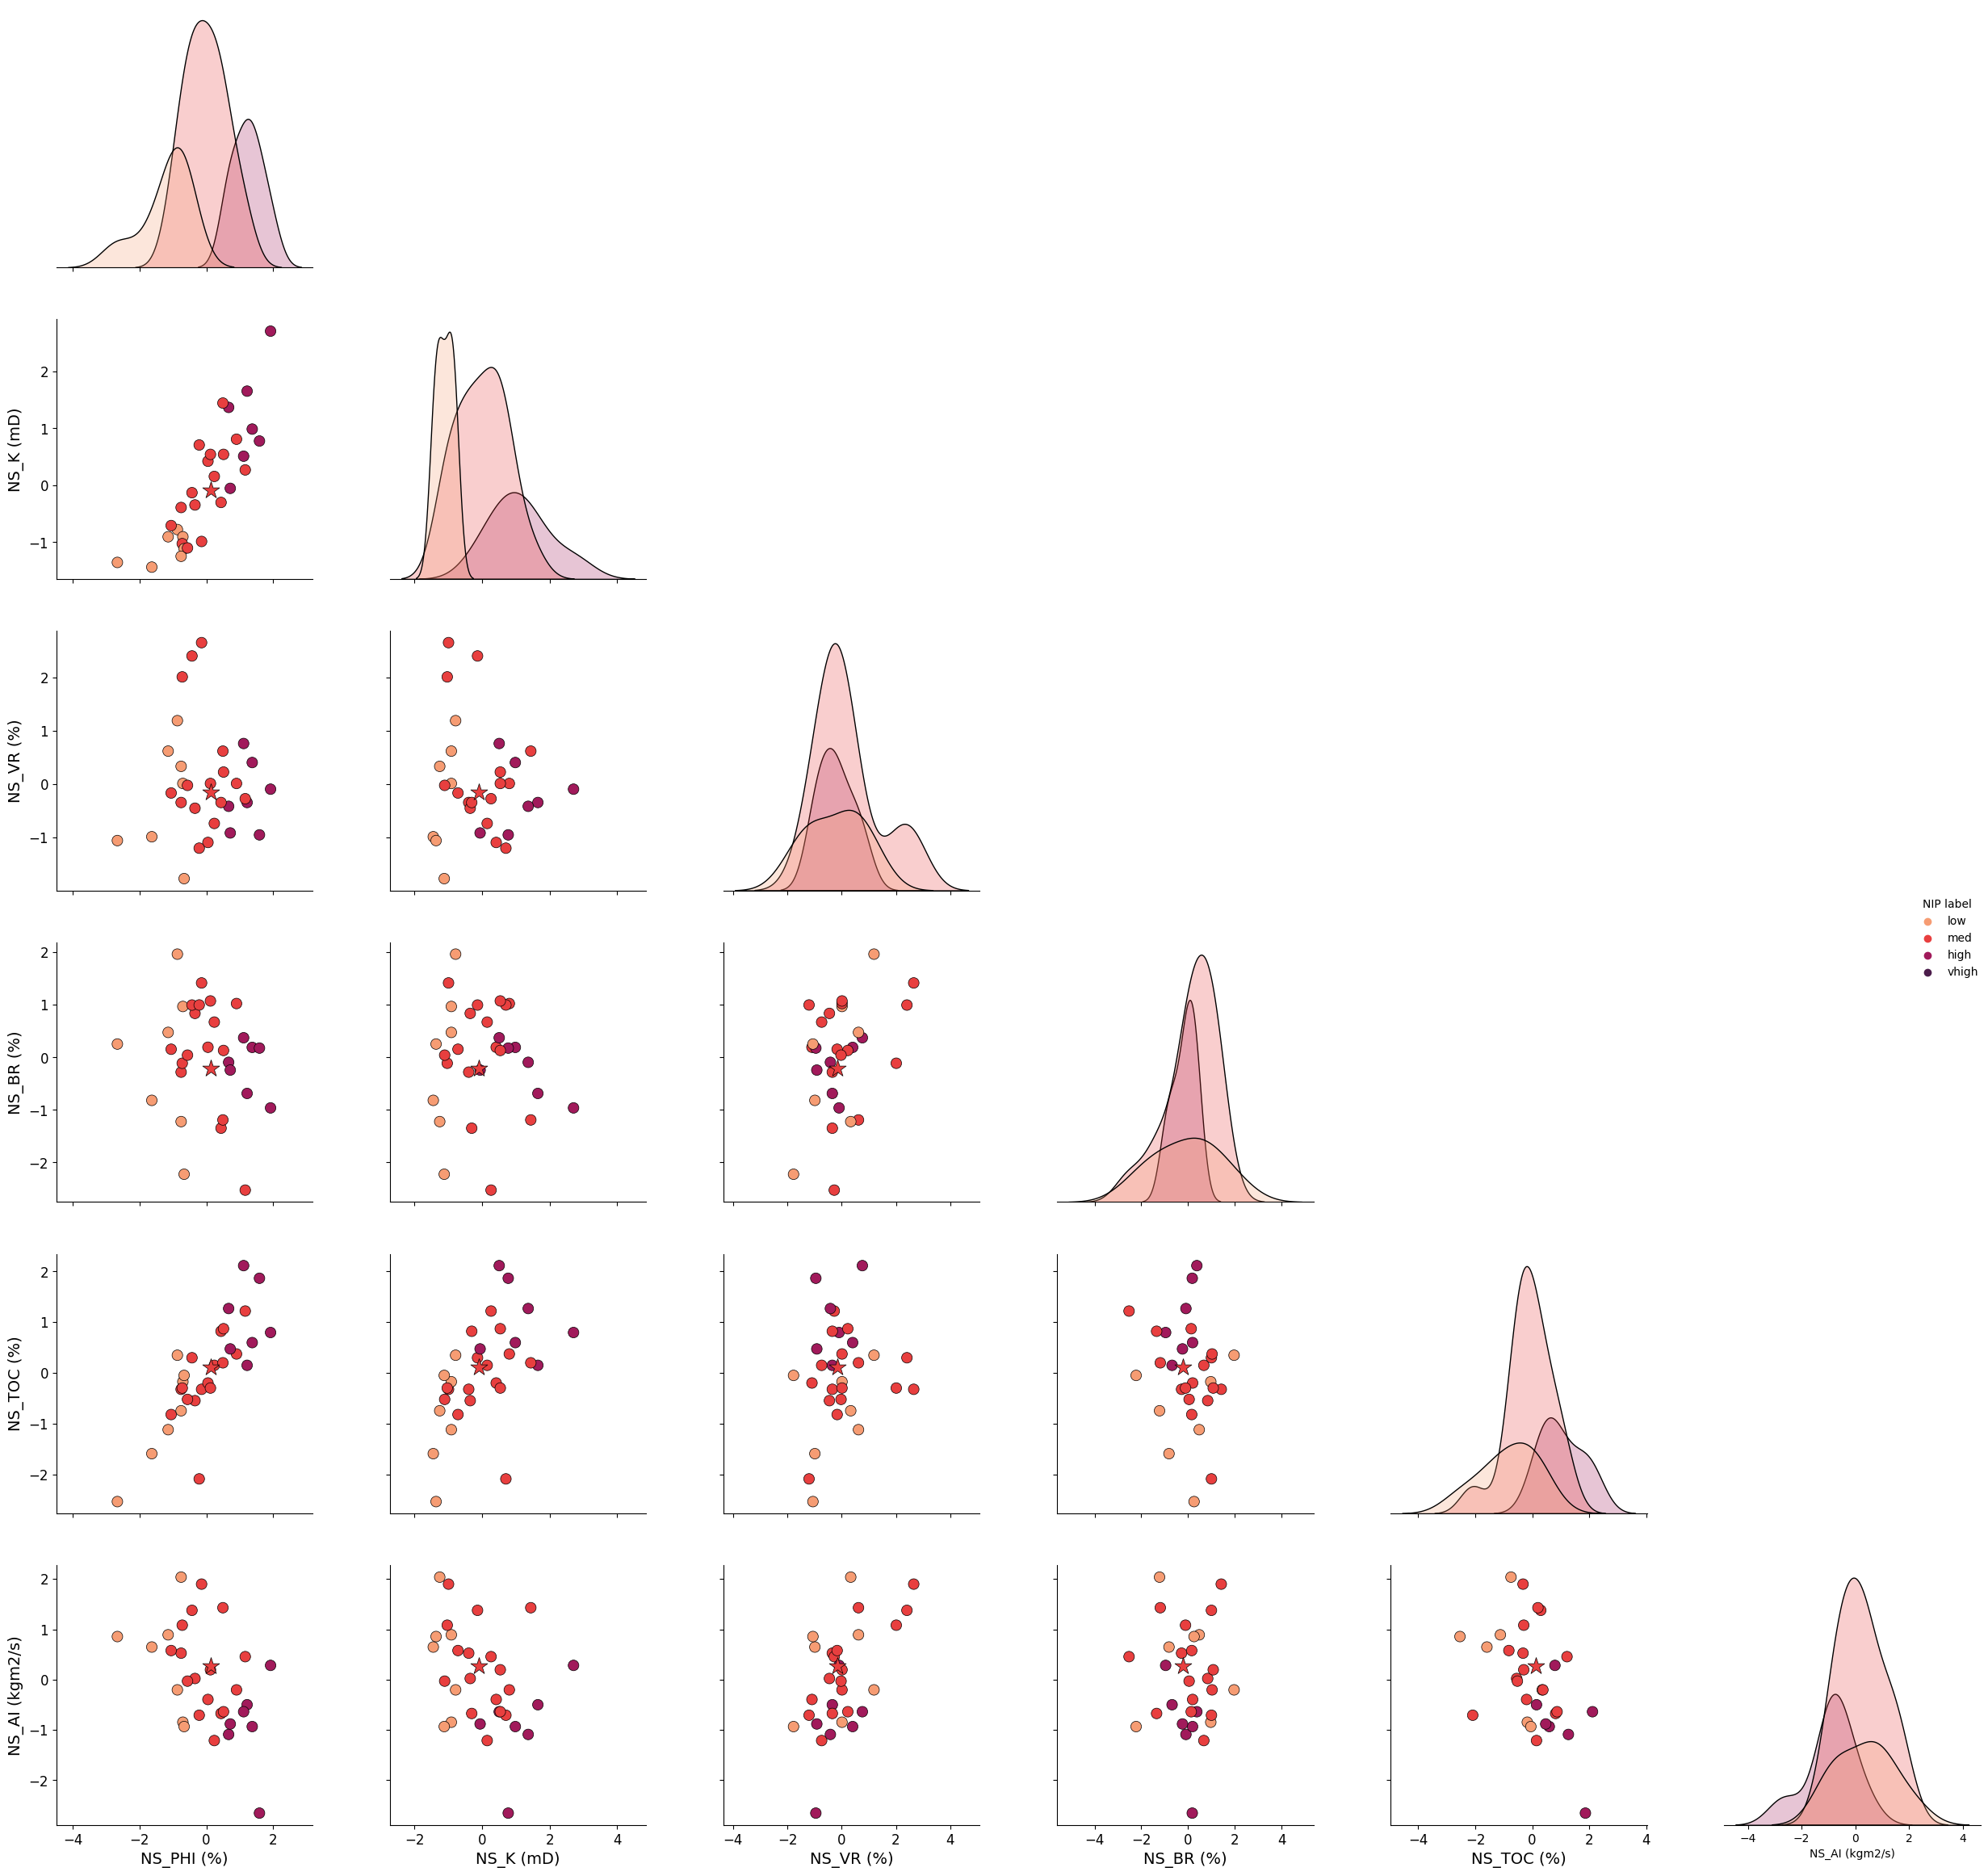

In [16]:
# Visualize the N+1 case dataset standardized

other_df = RT.standardizer(df_subset2, features, keep_only_std_features=False)

# Visualize the matrix scatter plot of the 3 standardized features and the response i.e., production levels.
#RT.
RT.matrix_scatter(other_df, ns_features, 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of standardized features colored by production levels for N+1 case samples', 1, hue_=response, num_OOSP=num_OOSP, n_case=False, save=True)

# r'NS_AI  ($\mathrm{kg \, m^2/s}$)' for label in latex

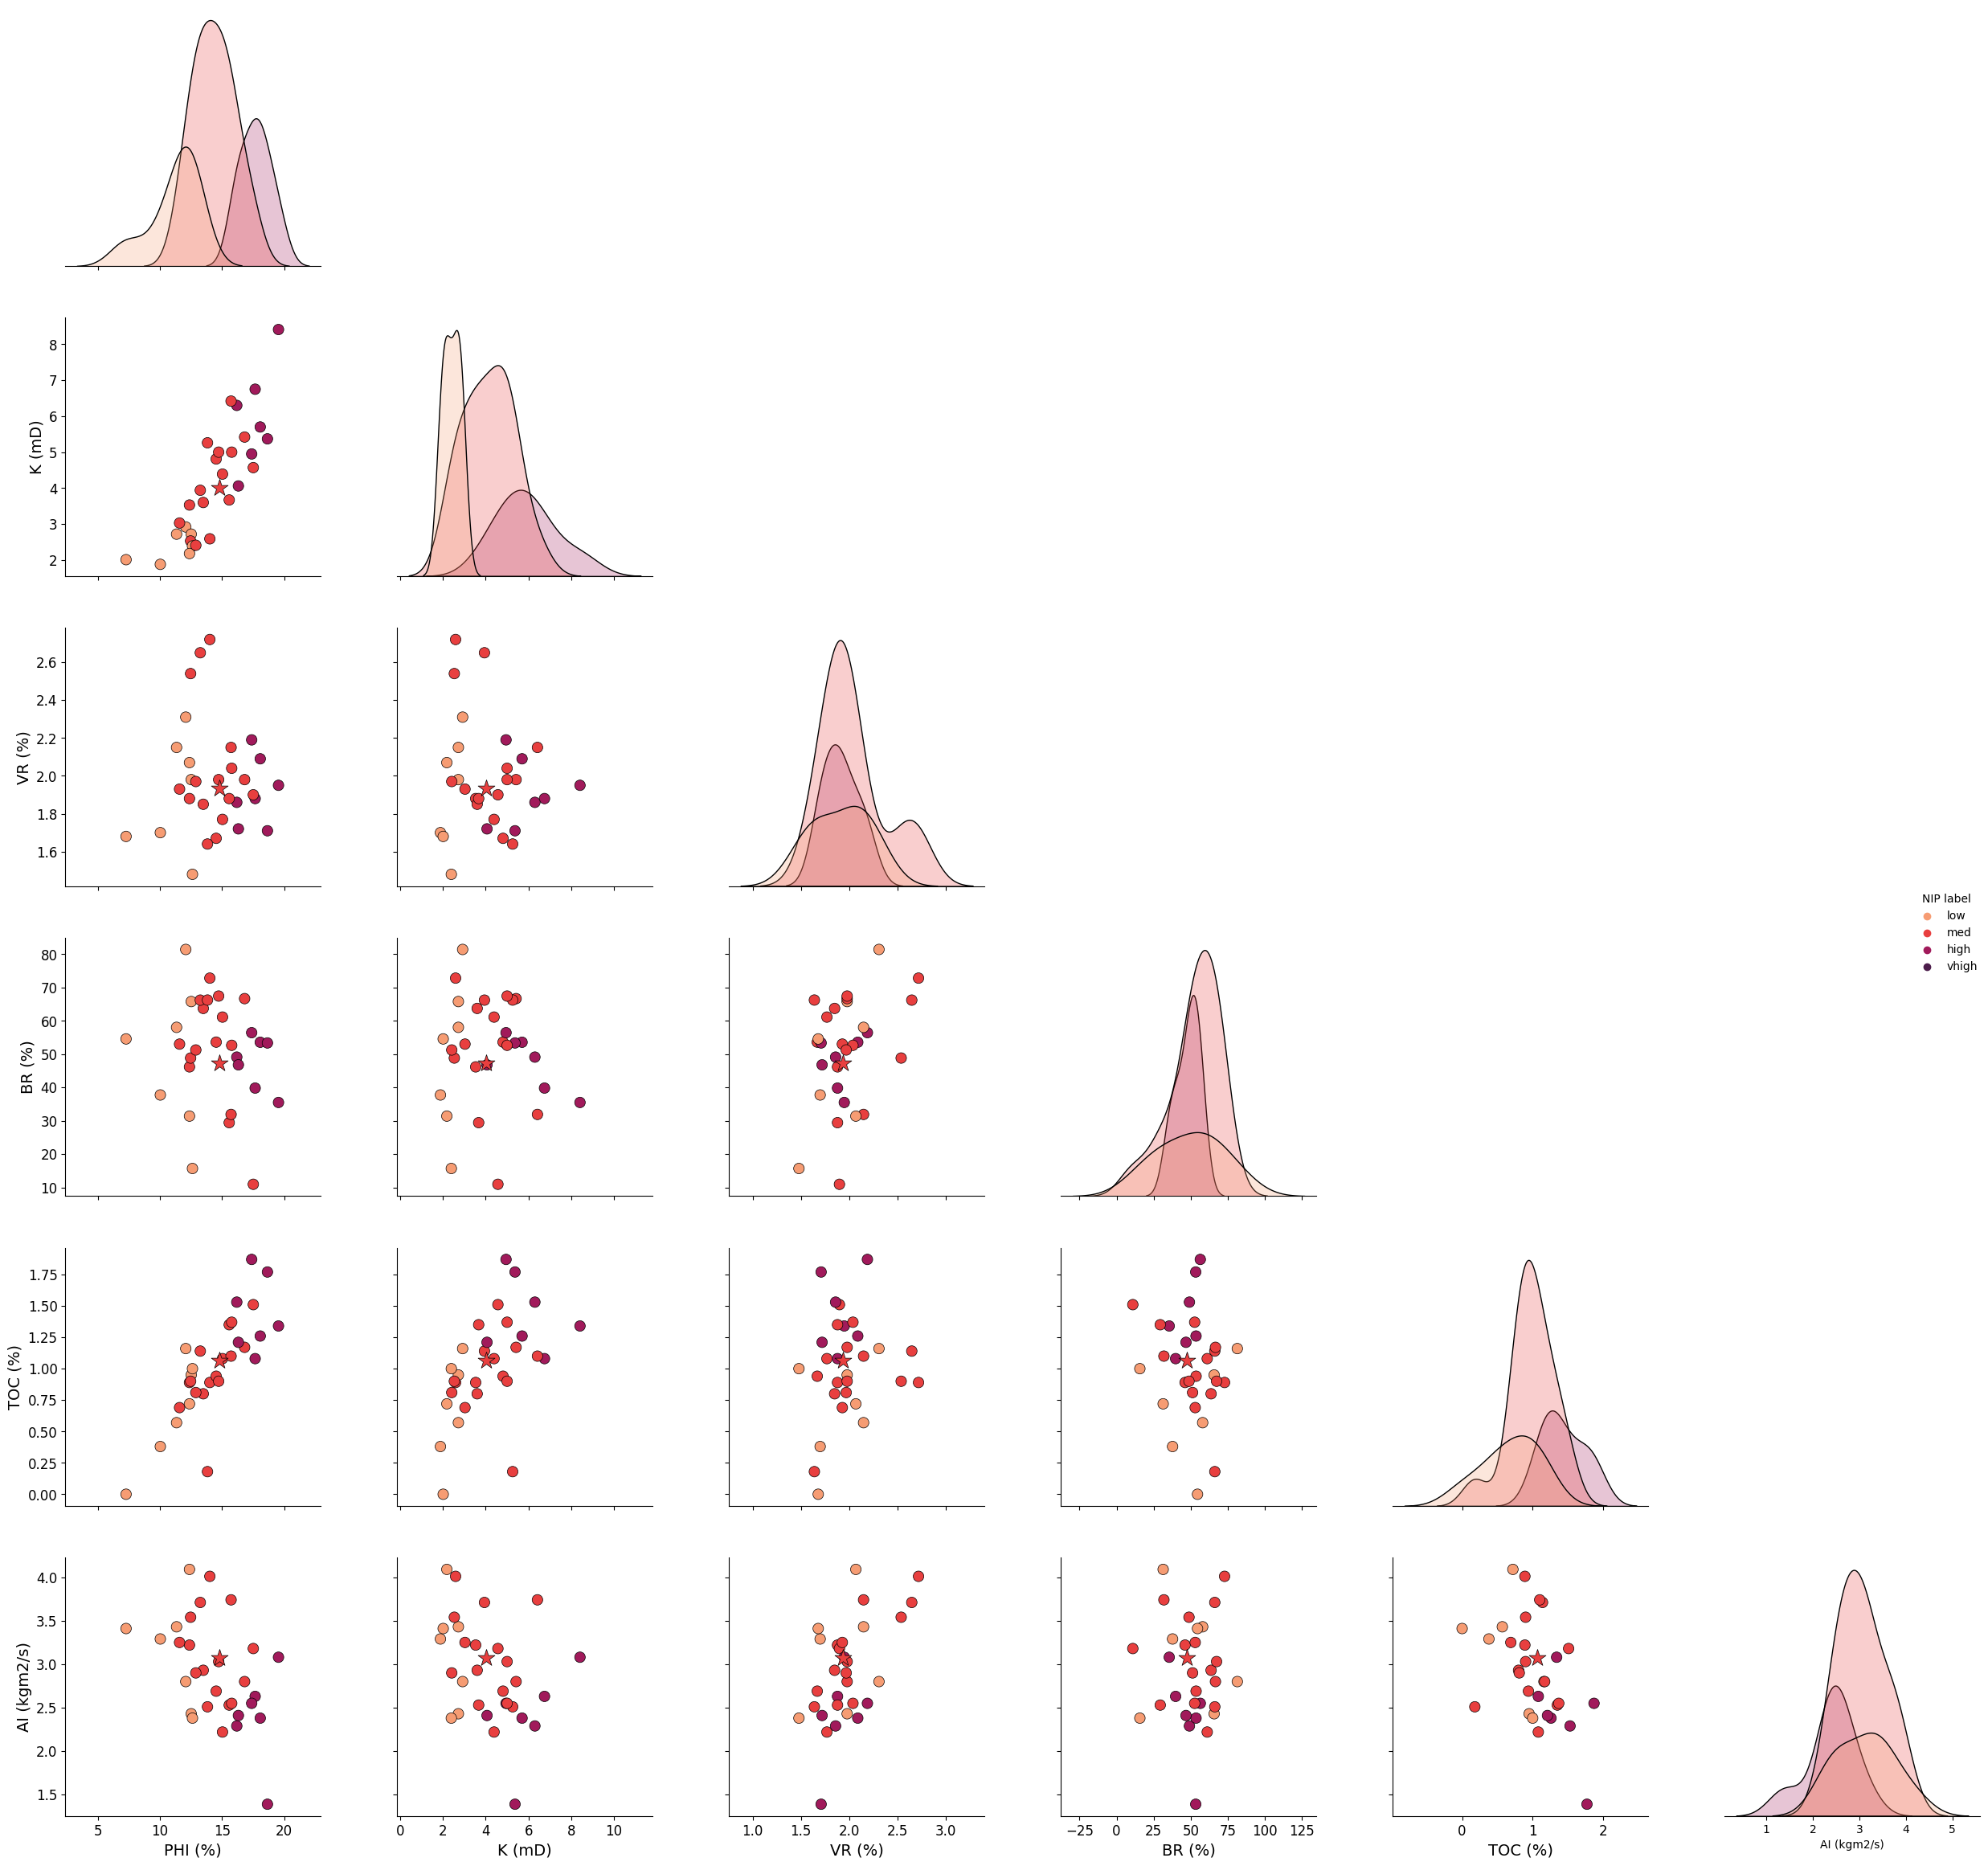

In [17]:
# Visualize the N+1 case dataset in original feature space

# Visualize the matrix scatter plot of the 3 standardized features and the response i.e., production levels.
#RT.
RT.matrix_scatter(other_df, features, 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of features colored by production levels for N+1 case samples', 1, hue_=response, num_OOSP=num_OOSP, n_case=False, save=True)

# Workflow Application: Synthetic Data


## Section 1: N-case samples


To make the above problem more trackable and highlight the contribution of the workflow, we take a subset of the entire dataset, e.g., N = 30 samples from the original dataset, then instantiate the class.

**Note**:Standardization is performed for all features under the hood, this is imperative as our model works with dissimilarity-based distance metric.

In [18]:
# Curate parameters and variables
num_realizations = 100
base_seed = 42
start_seed = 1
stop_seed = 10000
idx = 'Well'
dissimilarity_metric="euclidean"
make_figure = True
dim_projection = '2d' # since the projection (p), is to 2 features. Use '3d' if the projection is to 3 features
normalize_projections = False

# Instantiate the class
obj = RT.RigidTransformation(df=df_subset, features=features, num_OOSP=num_OOSP, idx=idx, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed, dissimilarity_metric=dissimilarity_metric, dim_projection=dim_projection, custom_dij=None)

# Run rigid MDS
random_seeds, all_real, calc_real, all_rmse, norm_stress = obj.run_rigid_MDS(normalize_projections=normalize_projections)

Visualize the base case and three realizations from the LDS obtained with the N-samples case to highlight difference in LDS obtained

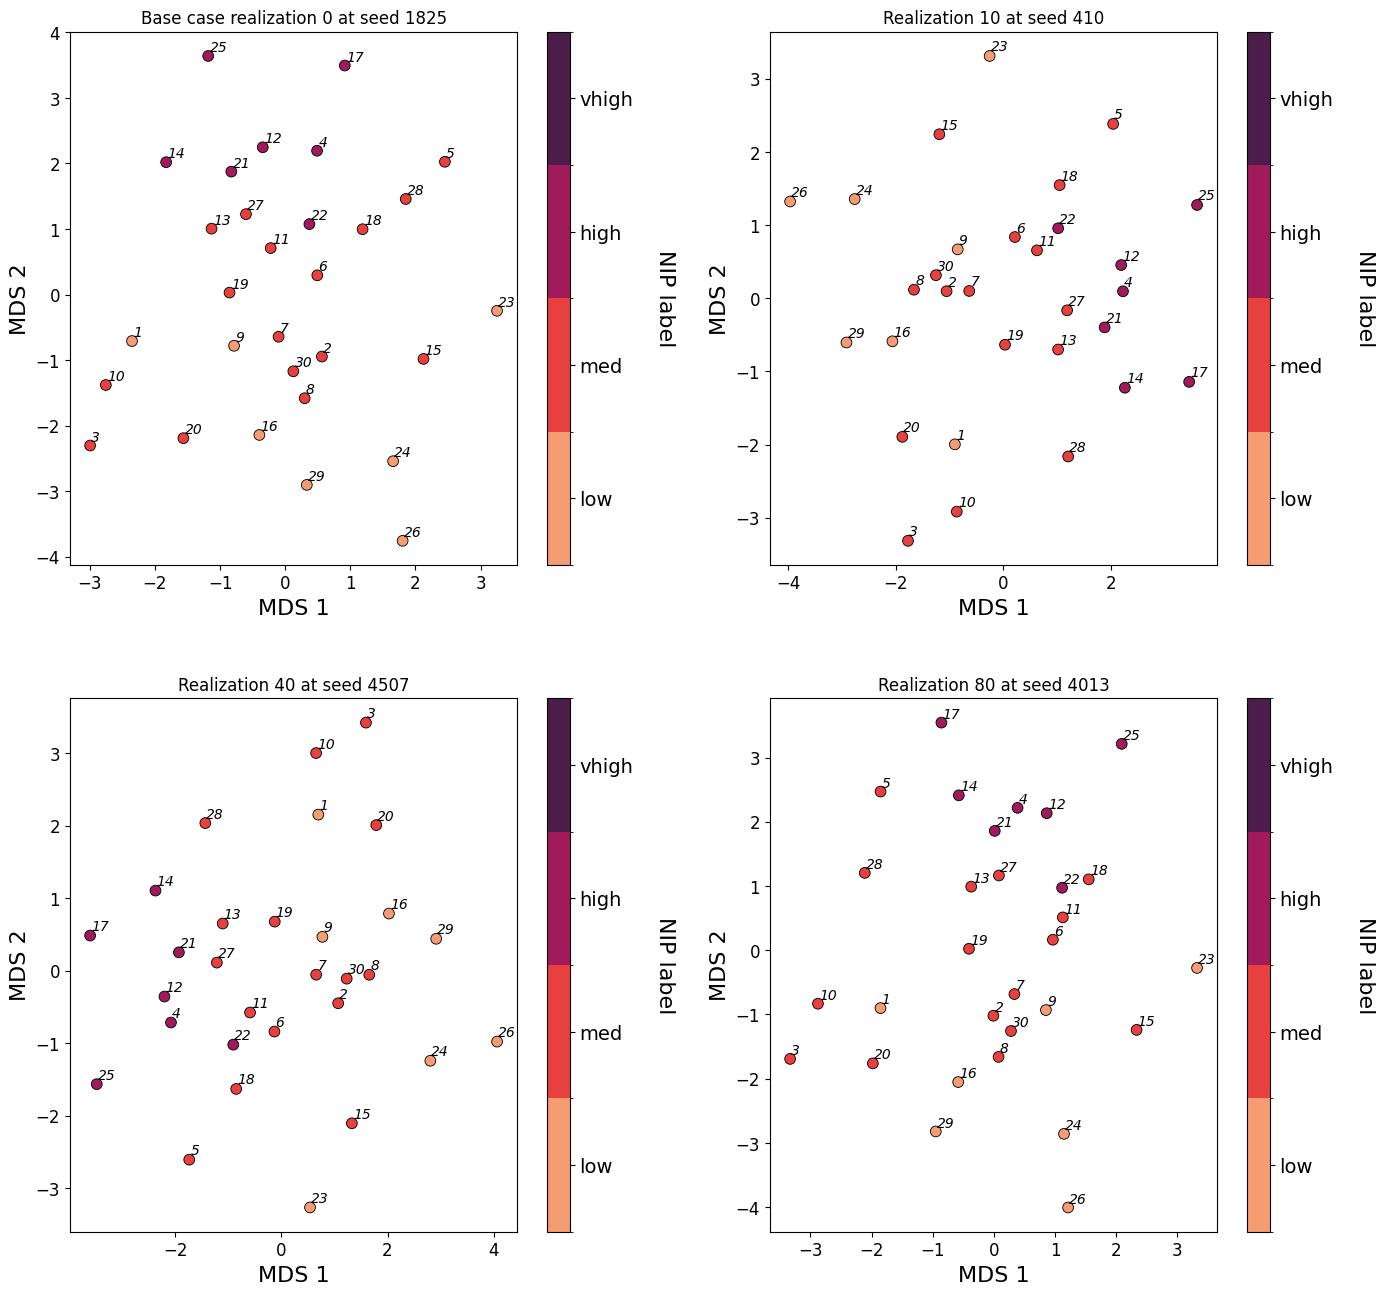

In [19]:
r_list=[0, 10, 40, 80]
Ax='MDS 1'
Ay='MDS 2'
title=['Base case realization ', 'Realization ', 'Realization ', 'Realization ']
x_off=0.02
y_off=0.07

#Set color map criteria
dpalette = sns.color_palette("rocket_r",n_colors = len(df_subset[response].unique()) + 1)
cmap=dpalette

obj.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, n_case=True, array2=None, save=True)

Prior to stabilization of data points,  visualize all realizations on the same plot to show that MDS is not rotation invariant.

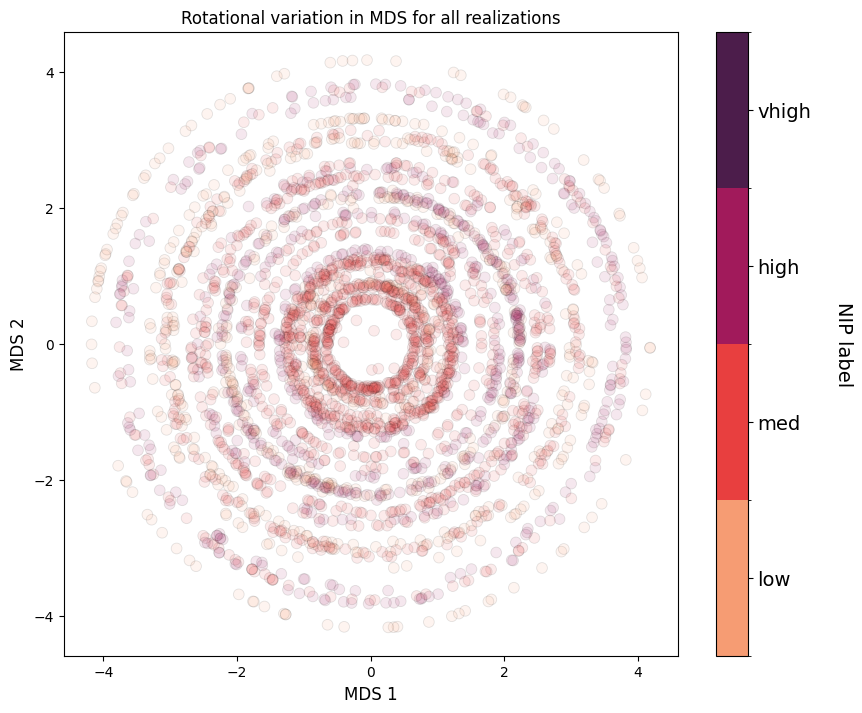

In [20]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='Rotational variation in MDS for all realizations', plot_type='variation', Ax=Ax, Ay=Ay, annotate=False, save=True)

Visualize the base case and the corresponding stabilized solution for previously chosen example realizations.

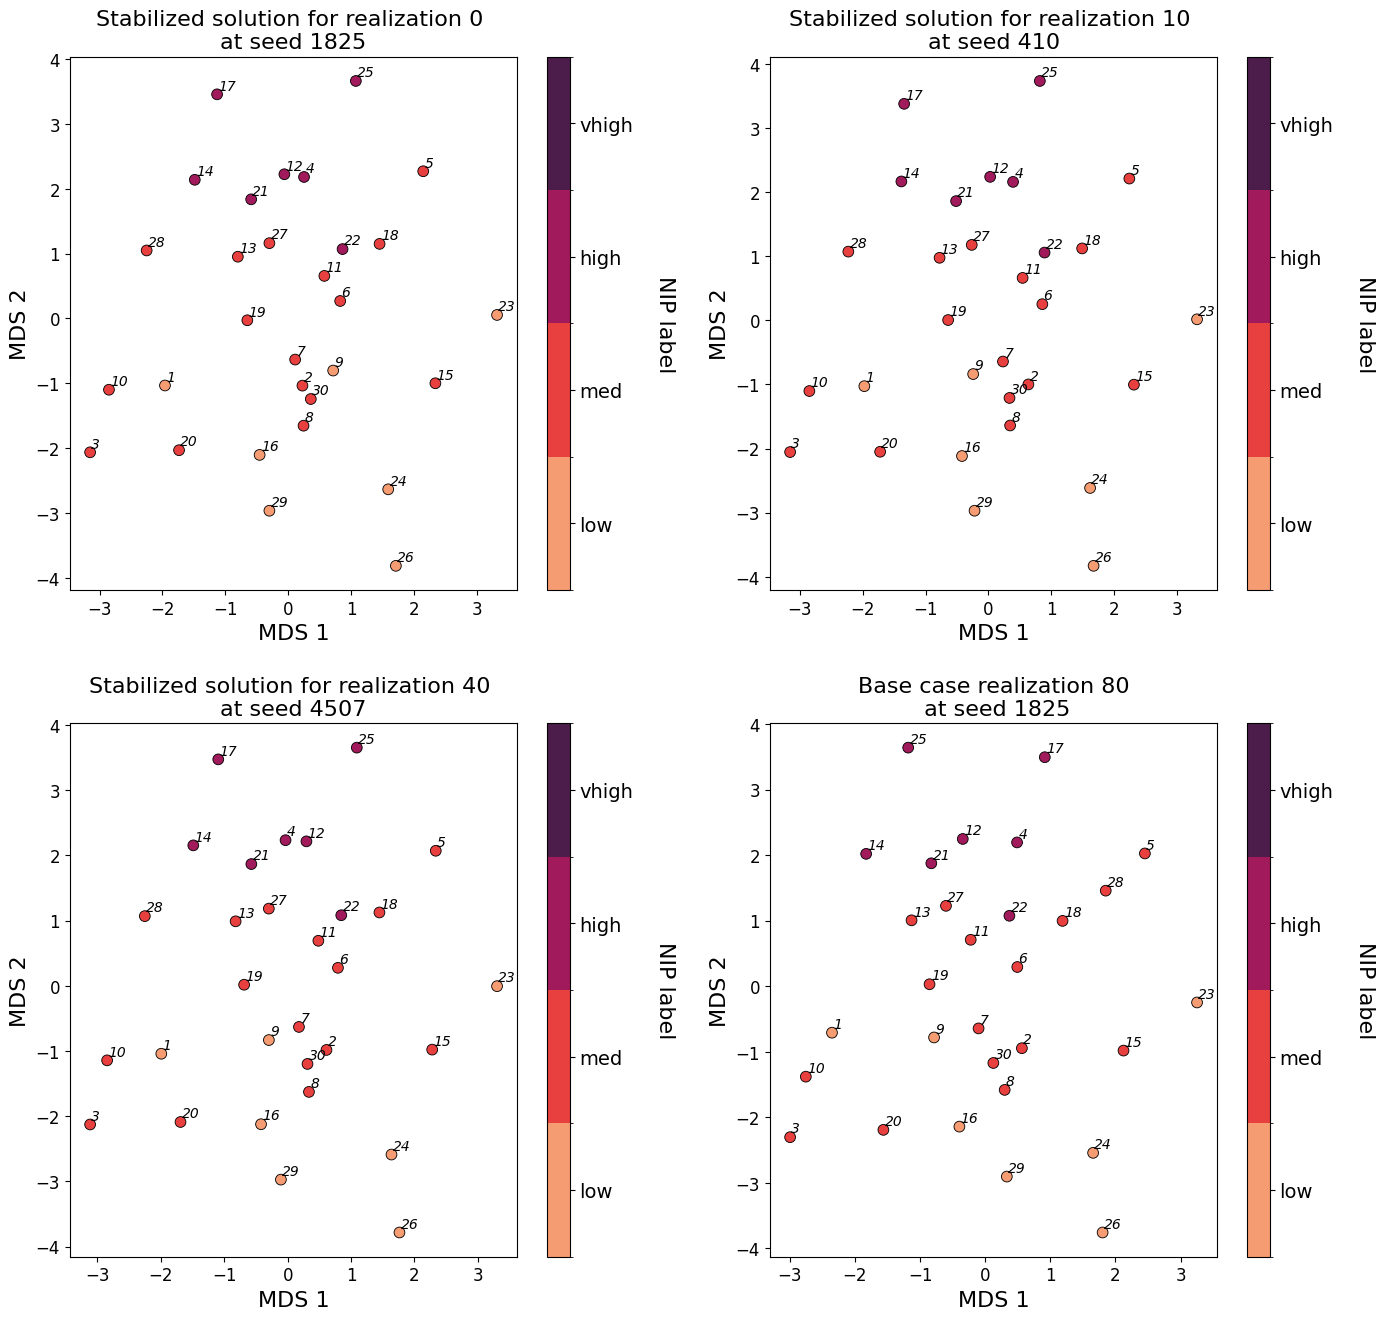

In [21]:
obj.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, n_case=True, array2=calc_real, save=True)

The realization examples are perfectly transformed to match the base case with little to no distortion with respect to the base case, and all sample points are registered correctly.


Next, visualize the 2D registration jitters in the newly found stabilized solutions.

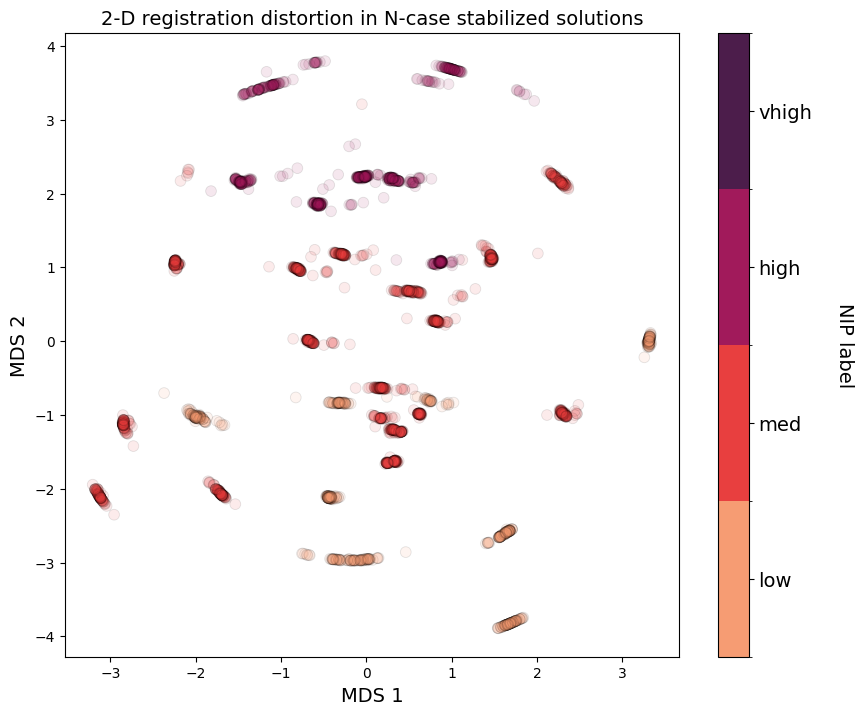

In [22]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='2-D registration distortion in N-case stabilized solutions',
                         plot_type='jitters', Ax=Ax, Ay=Ay, annotate=False, save=True)

We see the slight distortions on the anchors albeit not yet quantified for each sample in the dataset in the above figure, so we visualize the expectation of these stabilized solutions.

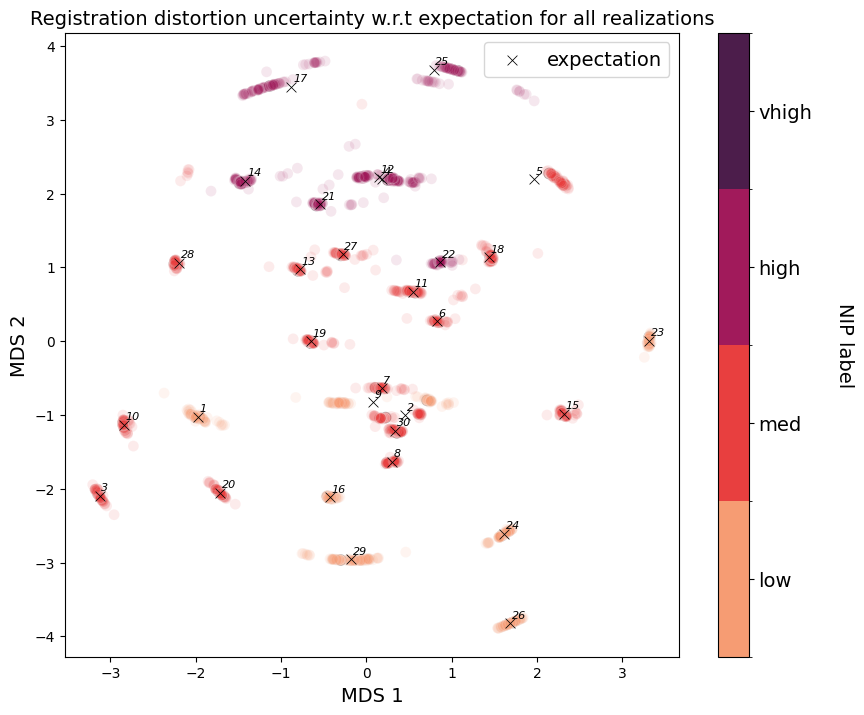

In [23]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='Registration distortion uncertainty w.r.t expectation for all realizations',
                         plot_type='uncertainty', Ax=Ax, Ay=Ay, save=True)

Based on the scenarios above, we see that regardless of the seed or random state used when computing the MDS projections, similar stabilized solutions are obtained with distortions/jitters. Next, we average out the stabilized solutions obtained to get a more accurate location for the projections in the MDS space by obtaining the expectation of the ith sample over enough realizations as the ground truth projection coordinates.


Note that using the ensemble expectation of the stabilized solution helps removed effects from slight random offsets, perturbations, or distortions if any within the n-sample demonstration.

In [24]:
# Set base case index of choice
bc_idx =0


E = obj.expectation(r_idx=bc_idx, Ax=Ax, Ay=Ay, verbose=True)

The effective variance of the base case is 5.821 with a MDS 1 variance of 2.2406 and MDS 2 variance of 3.5803
The effective variance of the expected stabilized solution is 5.7258 with a MDS 1 variance of 2.148 and MDS 2 variance of 3.5778


Visualize the ensemble expectation of the stabilized MDS projections over multiple realizations compared to the base case.

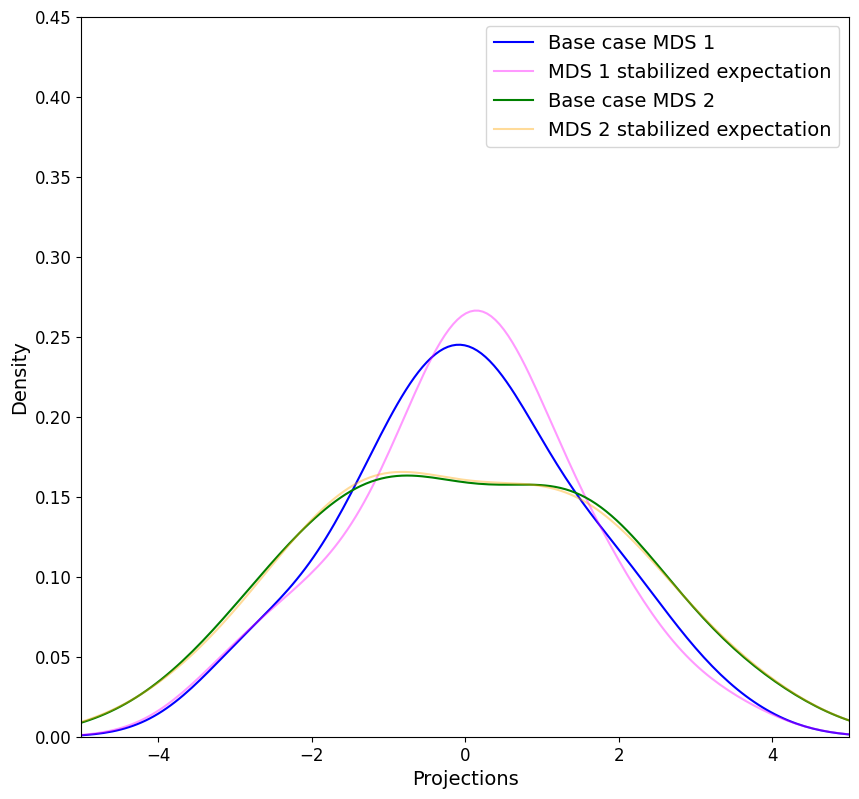

In [25]:
xmin = -5
xmax = 5
ymin = 0.0
ymax = 0.45

obj.expect_plotter(r_idx=bc_idx, Lx=Ax, Ly=Ay, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, save=True)

Visualize base case with ensemble expectation of the stabilized solution over all realizations for comparison for the N sample case.

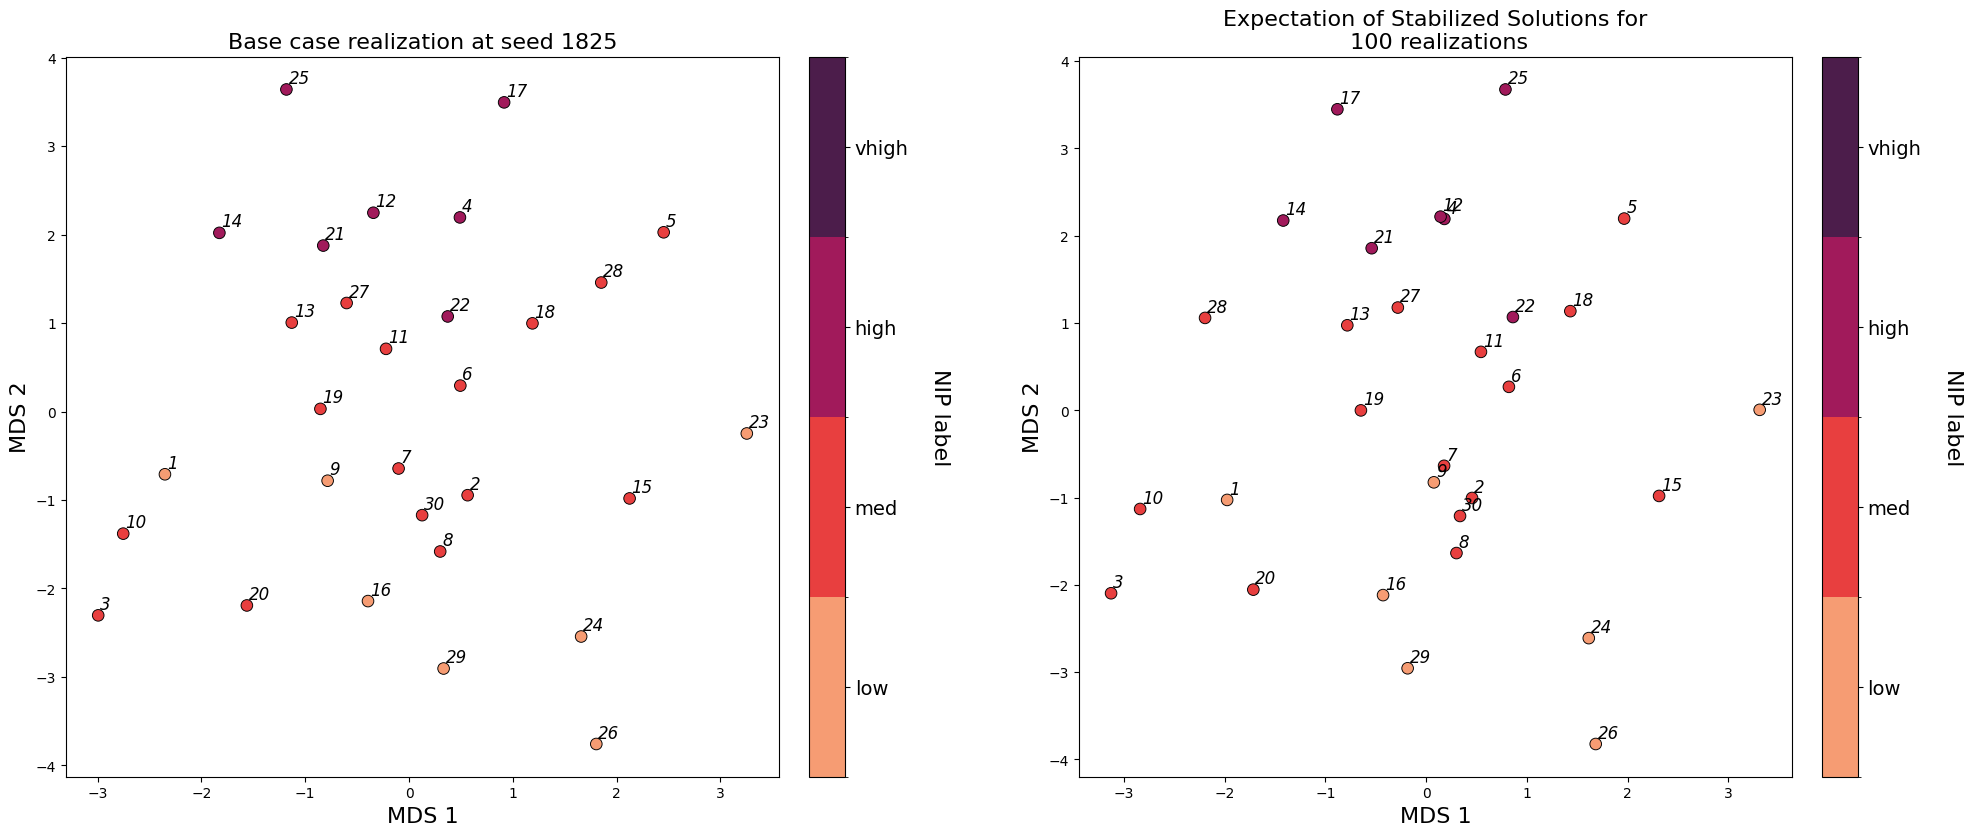

In [26]:
obj.compare_plot(response=response, r_idx=bc_idx, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, cmap=dpalette, n_case=True, save=True)

Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pairwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples.

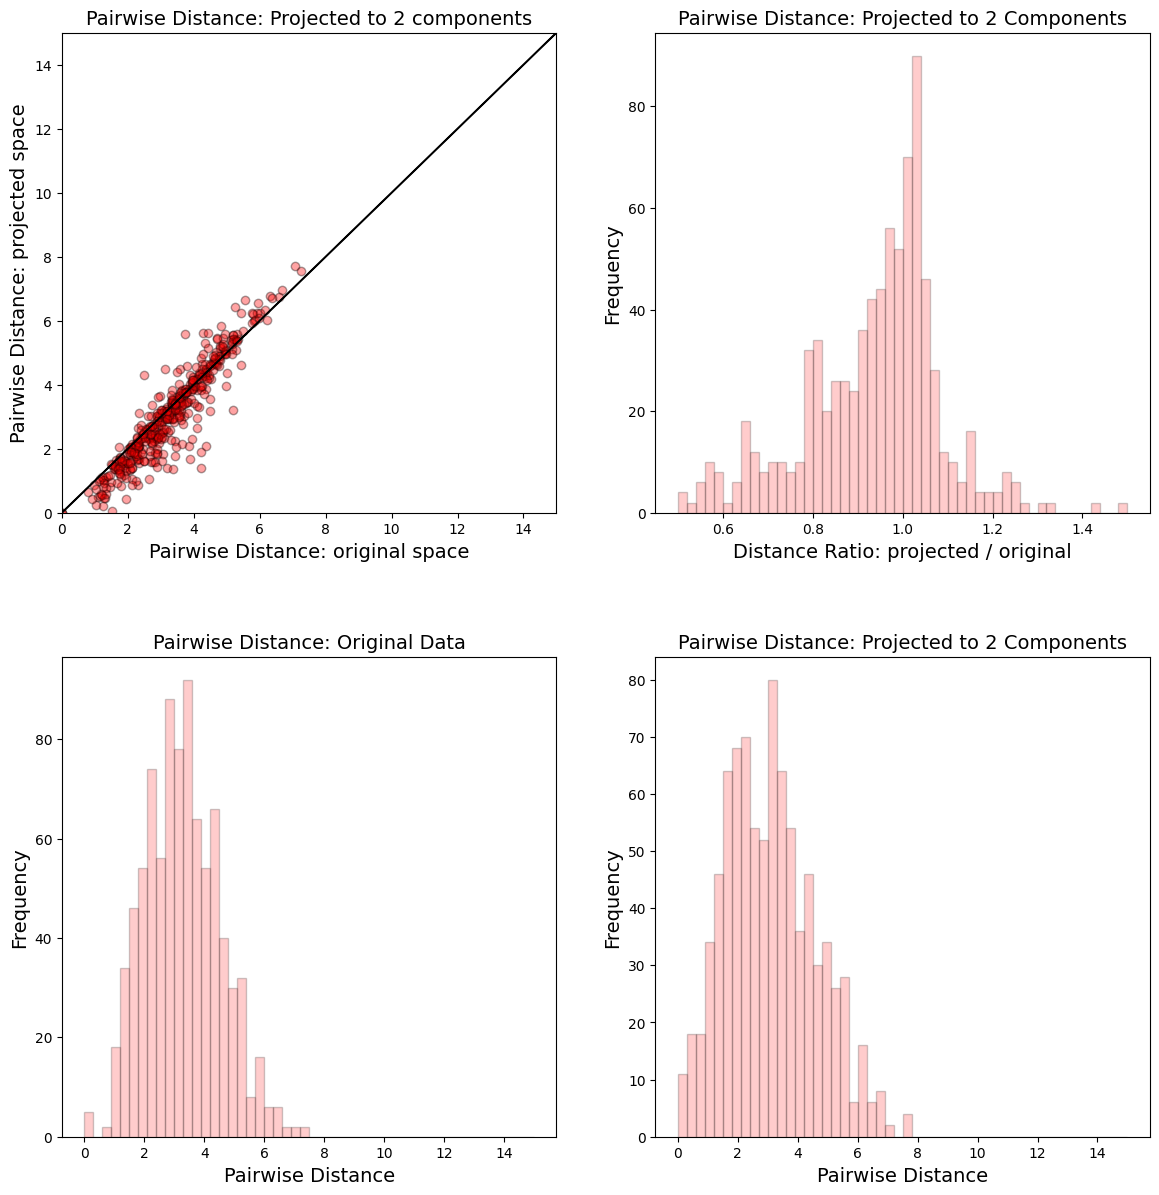

Distance Ratio, mean: 0.9004, standard deviation: 0.2109.


In [27]:
obj.visual_model_check(norm_type='L2', fig_name='Model check for N case samples', array=E, expectation_compute=True, save=True)

From the above, We projected to a 2 dimensional feature space and did a pretty good job preserving the pairwise distances between the samples.


Now, let's find the convex hull polygon and identify the anchor points for the n-case scenario in the lower dimensional space.

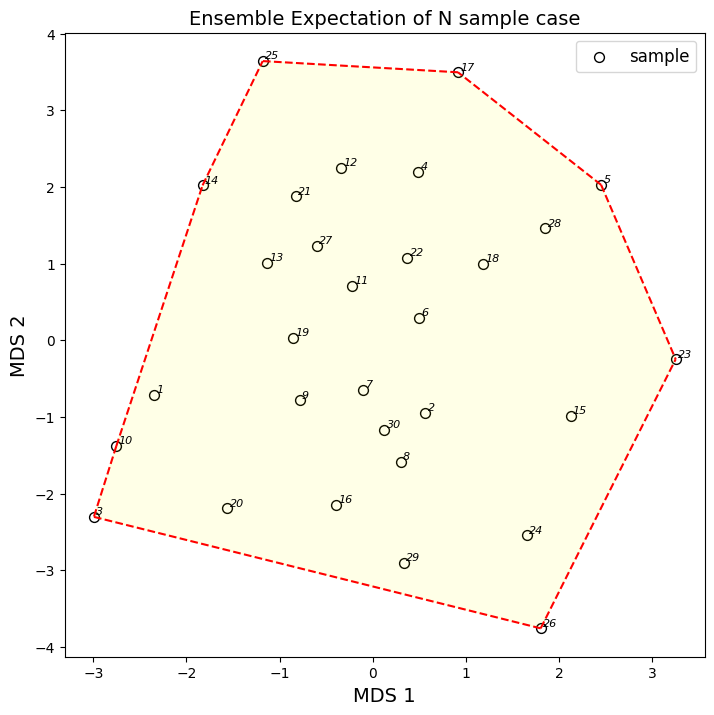

In [28]:
my_points, hull, vertices = obj.convex_hull(array=all_real, num_OOSP=None, title='Ensemble Expectation of N sample case', x_off=0.025, y_off=0.03, Ax=Ax, Ay=Ay, make_figure=make_figure, expectation_compute=False, save=True) #

Visualize the marginal distributions for each predictor and threshold at which proposed methodology will work and/or fail. This is shown because if the OOSP is chosen from the tails, the vertices of the anchor set might change, making stabilization a non-trivial task.

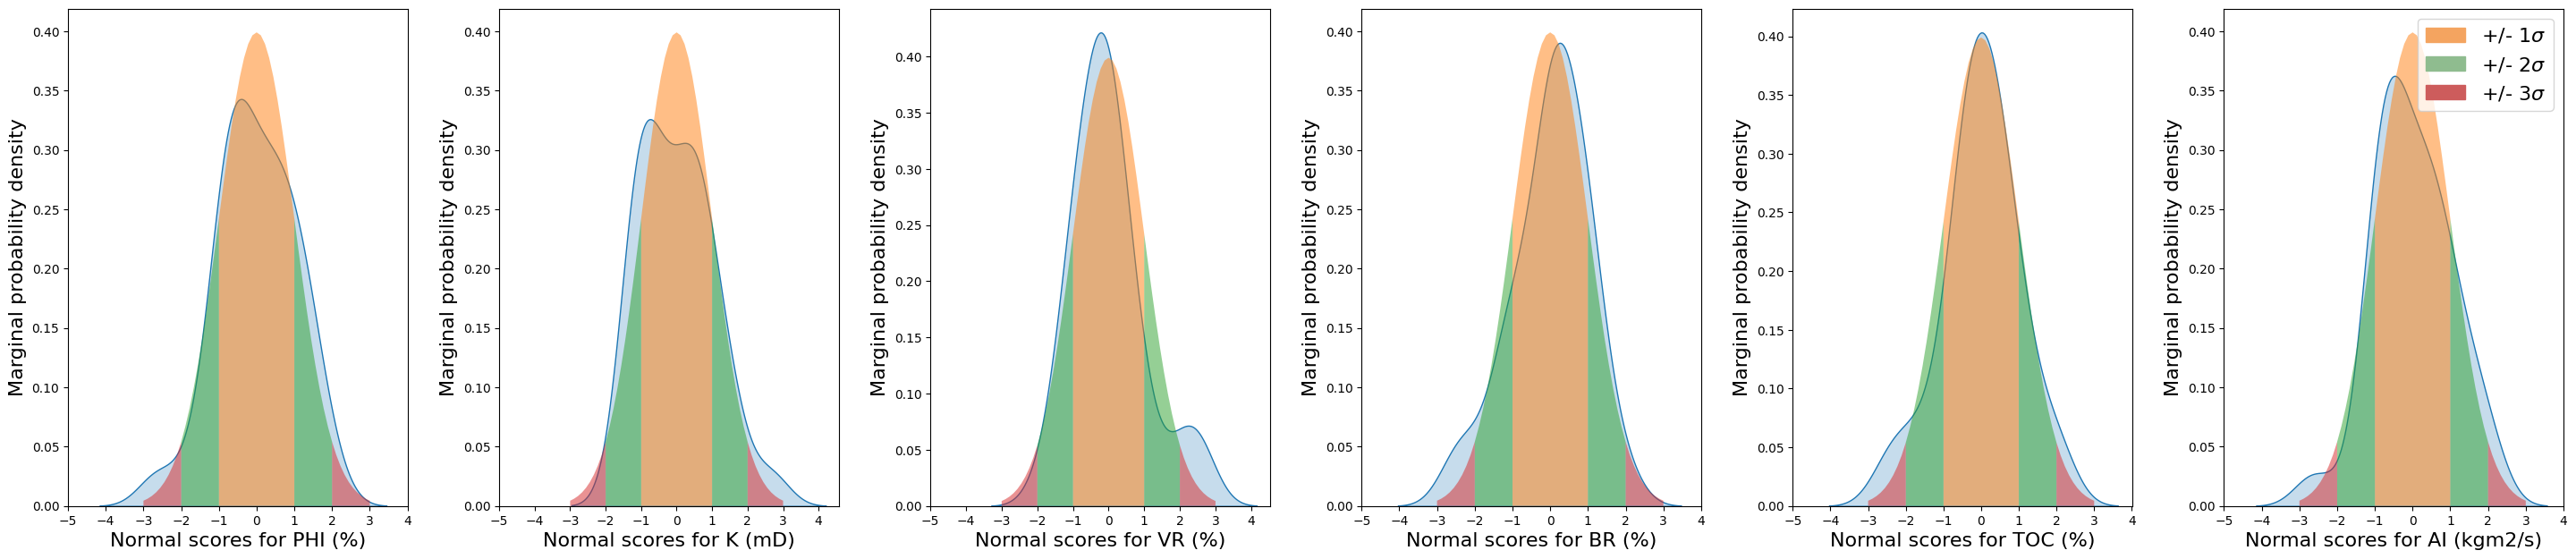

In [29]:
obj.marginal_dbn(save=True)


<br>

<br>



# Section 2:  For N + 1 Case with OOSP
<br>

Add OOSP to data and run

In [30]:
# Instantiate the class
obj2 = RT.RigidTransf_NPlus(df=df_subset2, features=features, num_OOSP=num_OOSP, idx=idx, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed, dissimilarity_metric=dissimilarity_metric, dim_projection=dim_projection, custom_dij=None)

In [31]:
# Run rigid MDS
random_seeds2, all_real2, calc_real2, all_rmse2, norm_stress2 = obj2.run_rigid_MDS(normalize_projections = normalize_projections)

Visualize base case and three example realizations for N+1 case with OOSP added

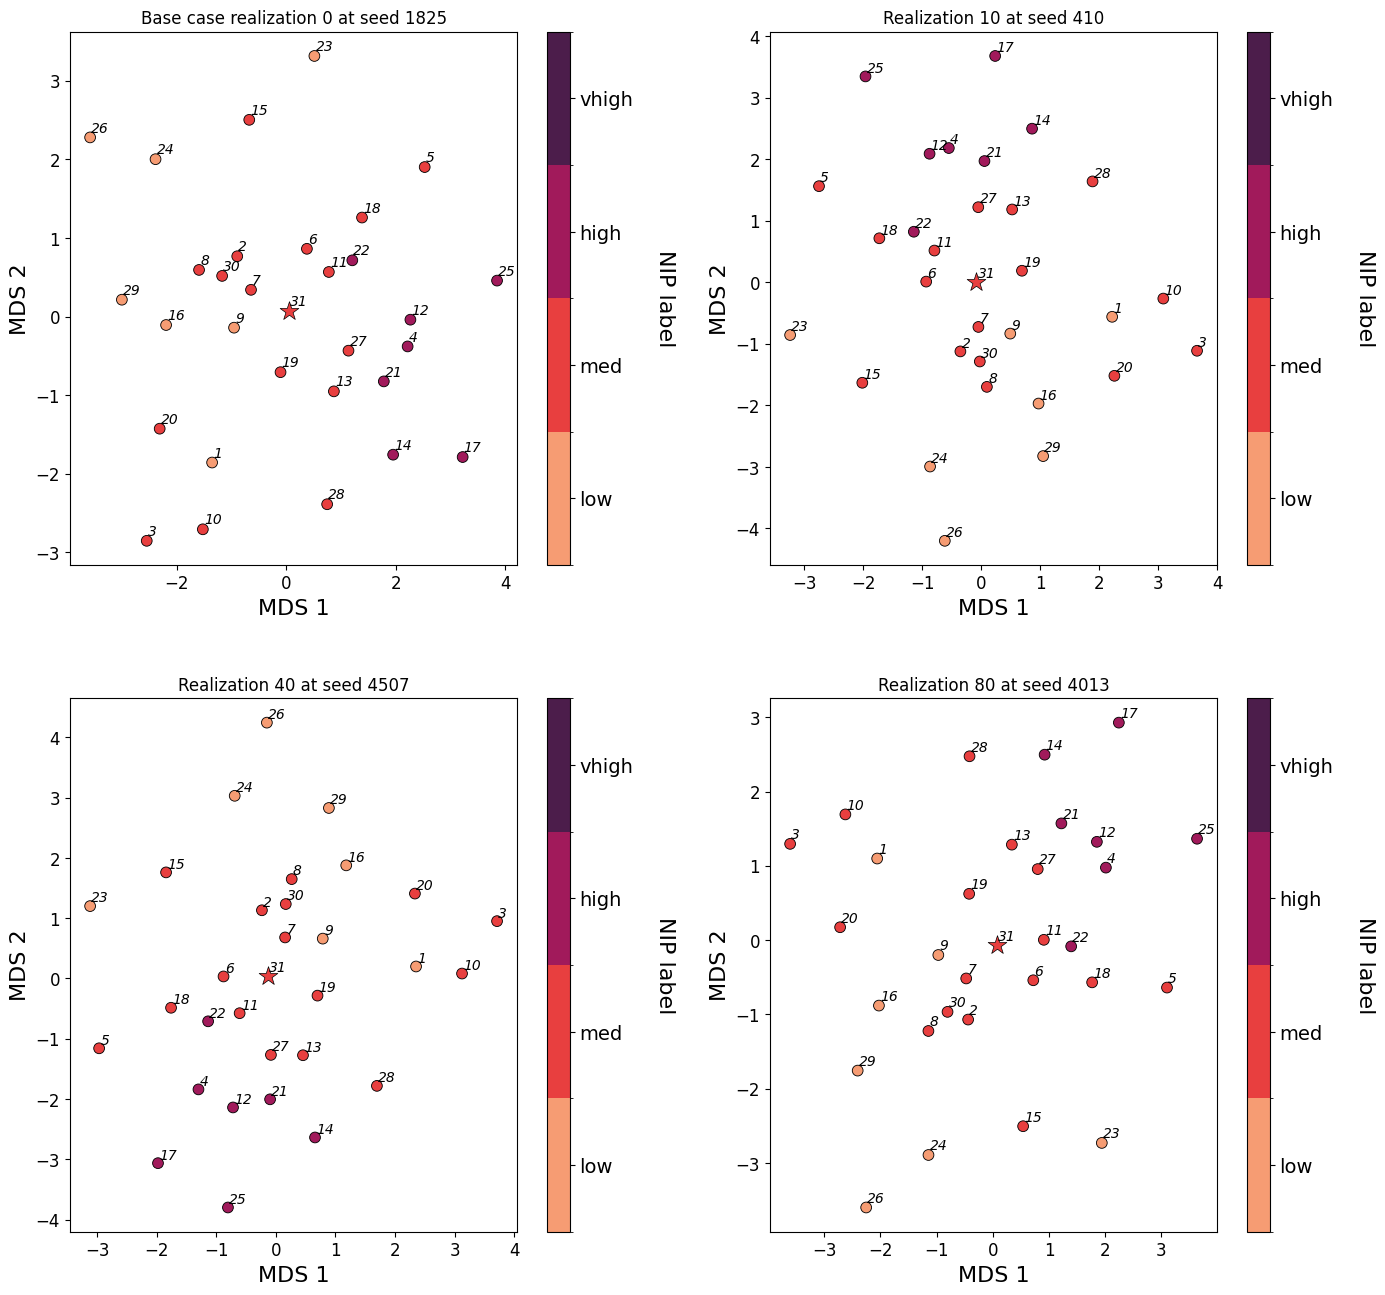

In [32]:
obj2.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, n_case=False, array2=None, save=True)

Visualize the base case and stabilized solution for prior example realizations with respect to the base case in N-sample case

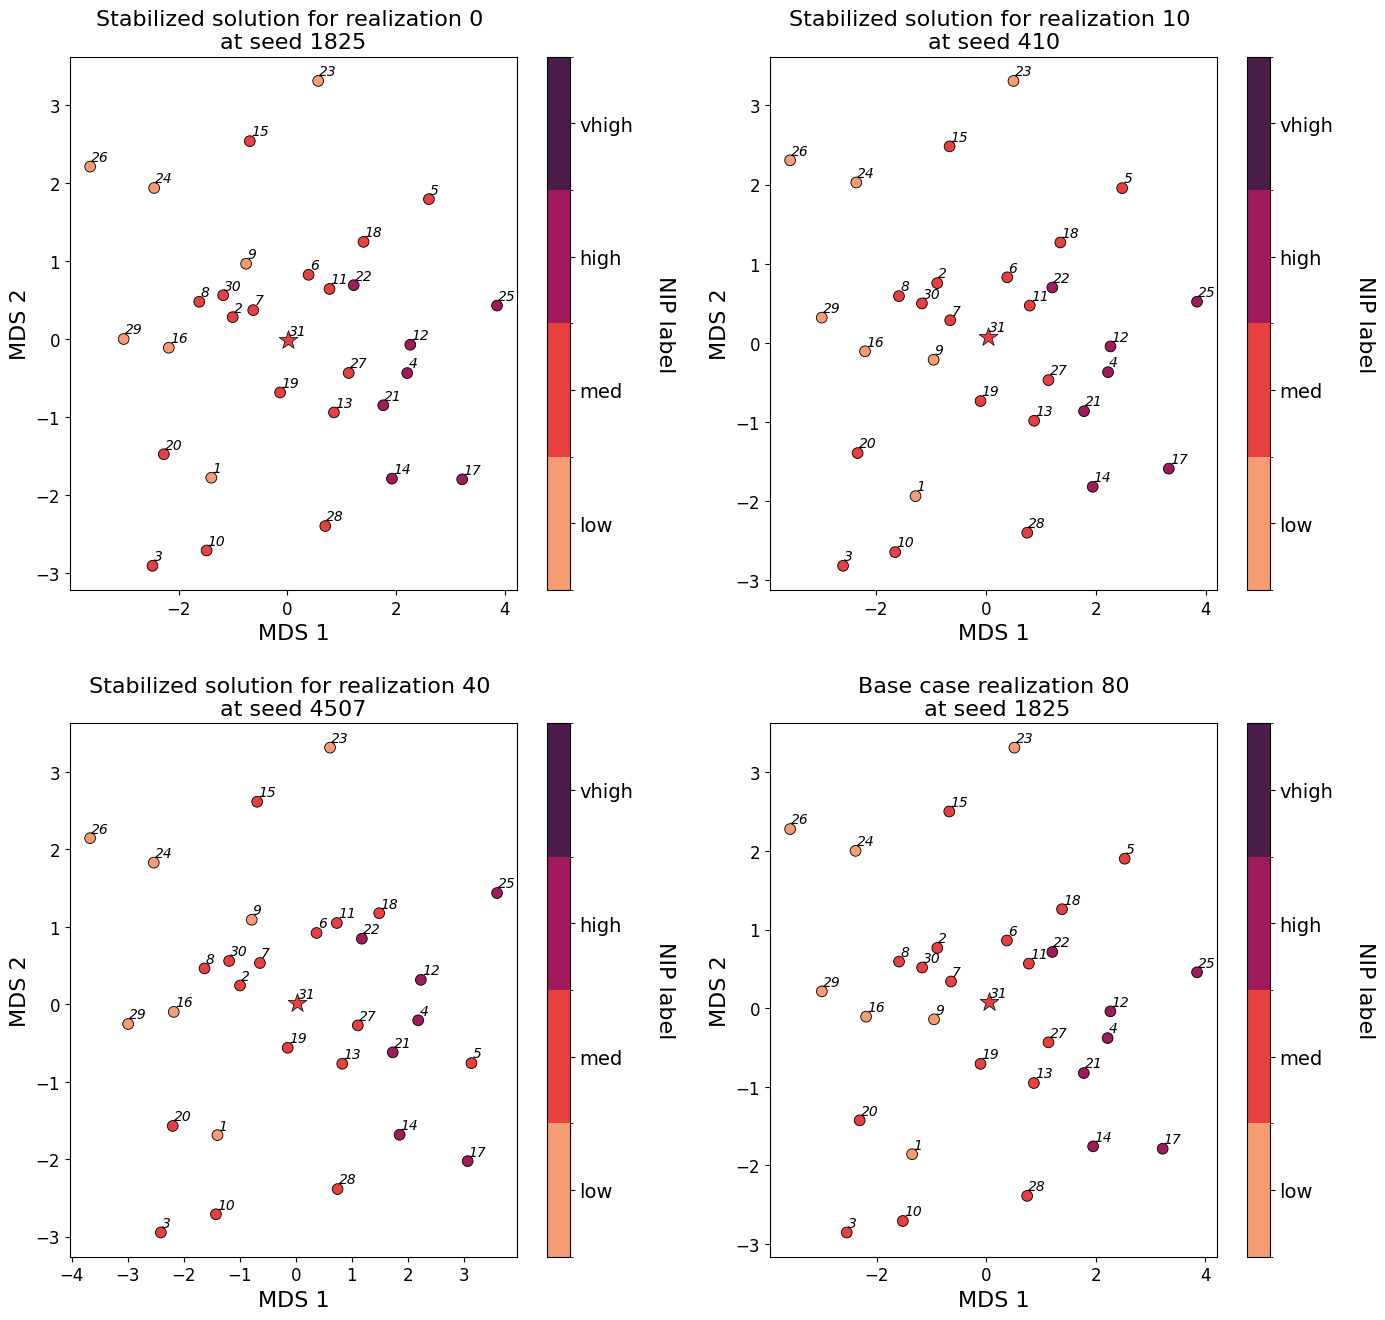

In [33]:
obj2.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, n_case=False, array2=calc_real2, save=True)

Since using the ensemble expectation of the stabilized solution helps remove effects from slight random offsets, perturbations, or distortions if any within the n+1-sample demonstration.

In [34]:
# Set base case index of choice for N+1 scenario
bc_idx = 0 # new_idx


E2 = obj2.expectation(r_idx=bc_idx, Ax=Ax, Ay=Ay, verbose=True)

The effective variance of the base case is 5.83 with a MDS 1 variance of 3.5667 and MDS 2 variance of 2.2633
The effective variance of the expected stabilized solution is 5.7695 with a MDS 1 variance of 3.5755 and MDS 2 variance of 2.194


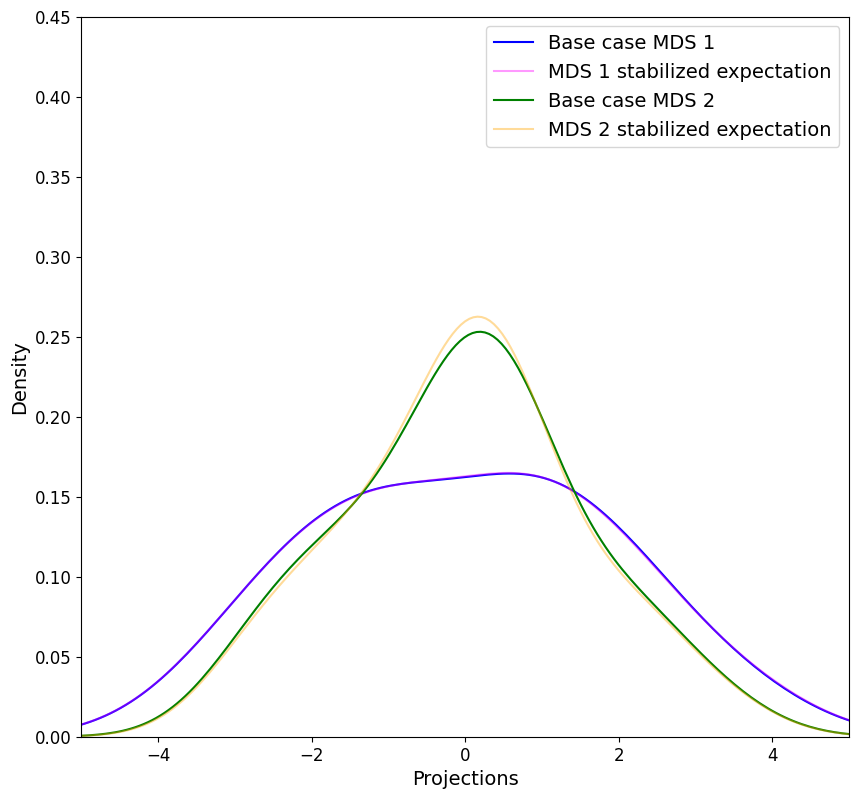

In [35]:
xmin2 = -5
xmax2 = 5
ymin2 = 0.0
ymax2 = 0.45

obj2.expect_plotter(r_idx=bc_idx, Lx=Ax, Ly=Ay, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, save=True)

Visualize the base case with ensemble expectation of the stabilized solution over all realizations for comparison to view distortions if any

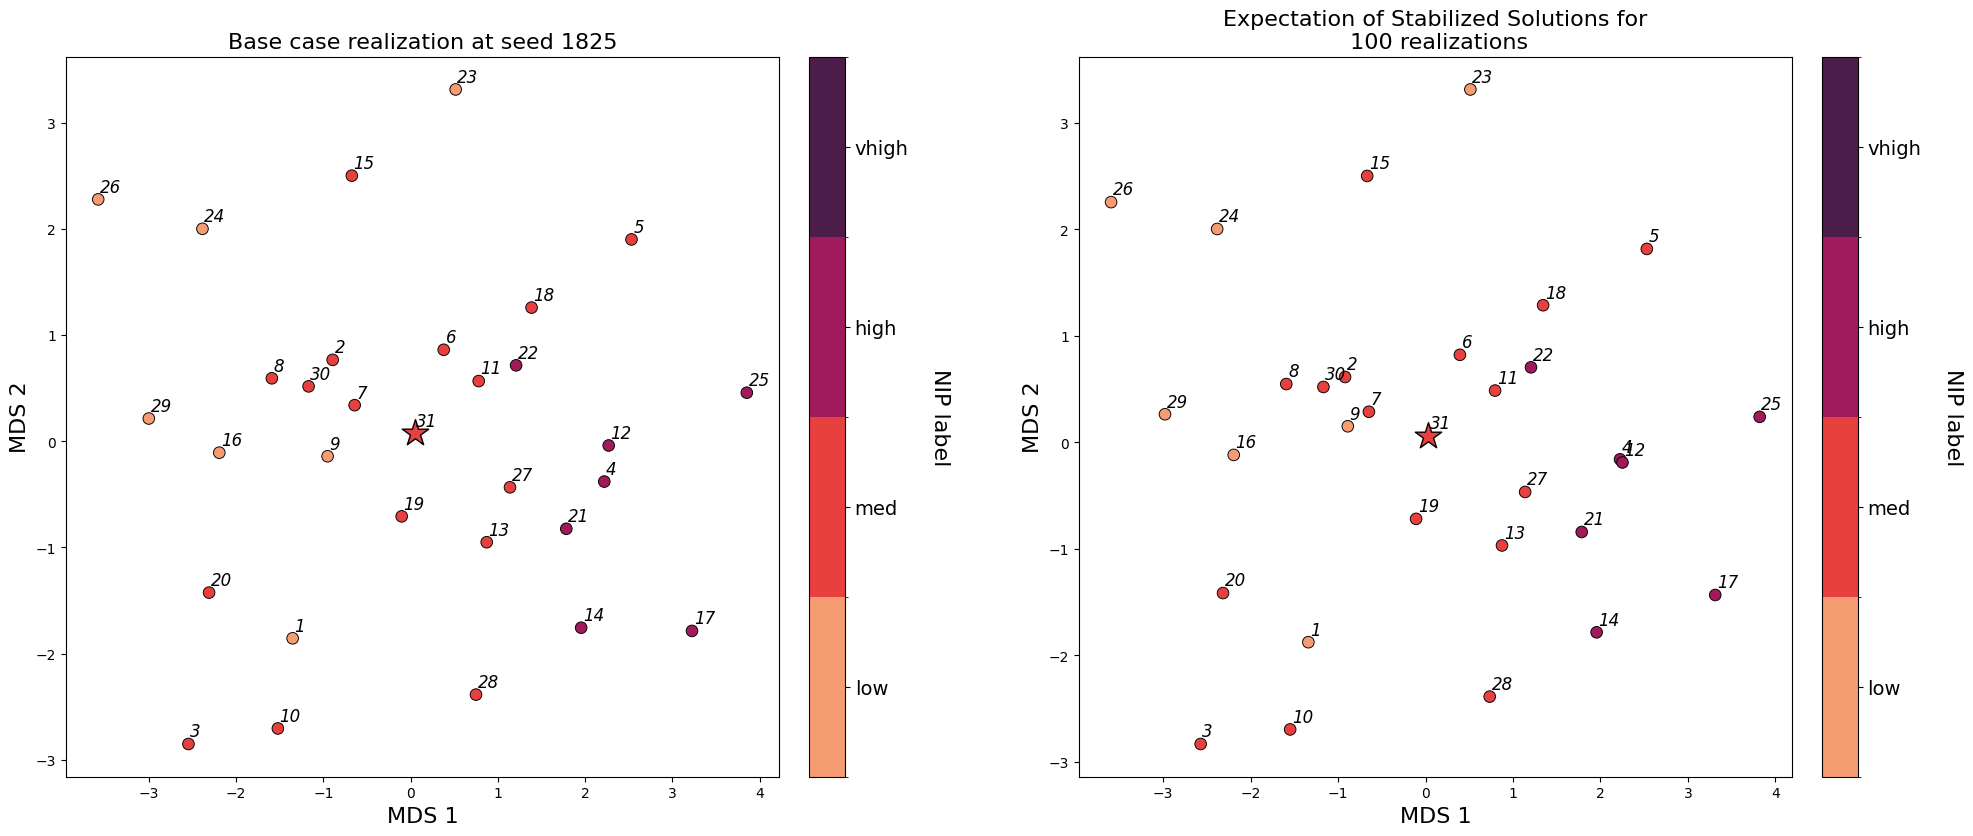

In [36]:
obj2.compare_plot(response=response, r_idx=bc_idx, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, n_case=False, cmap=dpalette, save=True)

Find the convex hull polygon of the expected stabilized solution for all realizations in the N+1 scenario

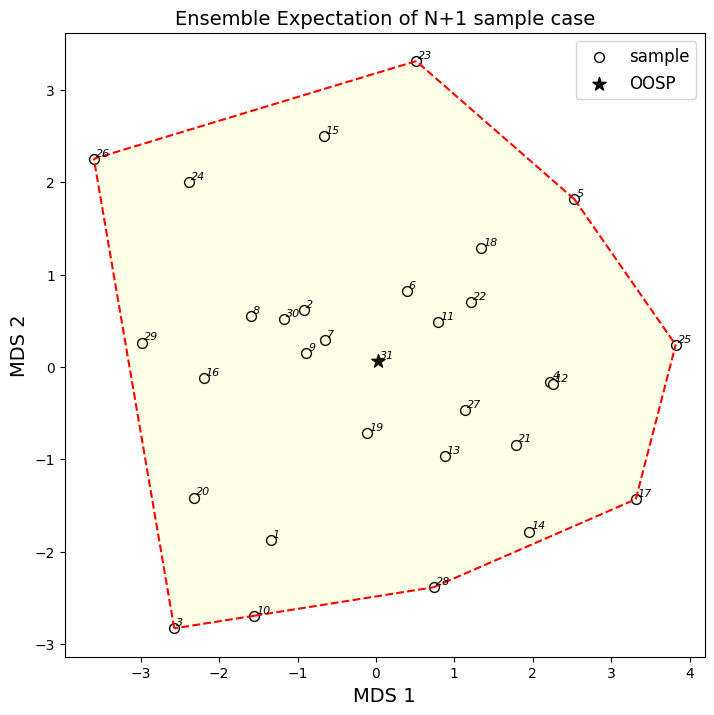

In [37]:
my_points_expected, hull_expected, vertices_expected = obj2.convex_hull(array=E2, num_OOSP=num_OOSP, title='Ensemble Expectation of N+1 sample case', x_off=0.025, y_off=0.03, Ax=Ax, Ay=Ay, make_figure=make_figure, expectation_compute=True, n_case=False, save=True) #0.01,0.015

Stabilize the anchors from the N+1 case to match the N-case such that the same representation is obtained and visualize, then find stabilized expected anchor representation and visualize

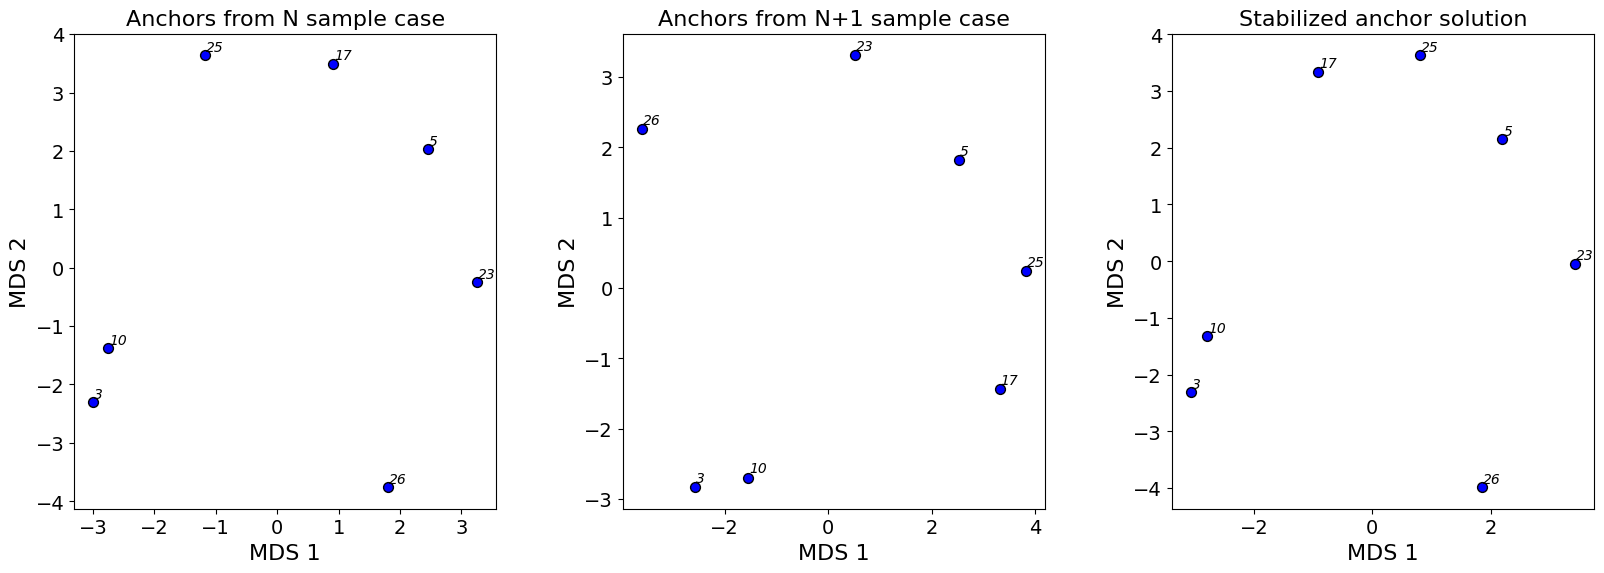

In [38]:
anchors1_exp, anchors2_exp, R_anchors_exp, t_anchors_exp, rmse_err_anchors_exp, stable_coords_anchors_exp, stable_coords_alldata_exp, rmse_err_alldata_exp = obj2.stabilize_anchors(array1=my_points, array2=my_points_expected, hull_1=hull, hull_2=hull_expected, normalize_projections=normalize_projections)

obj2.stable_anchor_visuals( Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off)

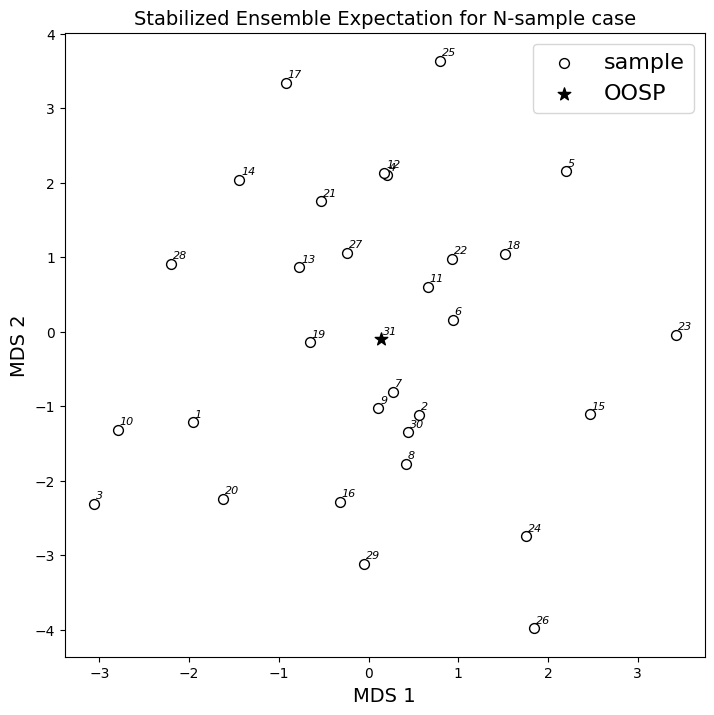

In [39]:
obj2.stable_representation(title='Stabilized Ensemble Expectation for N-sample case', Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off)

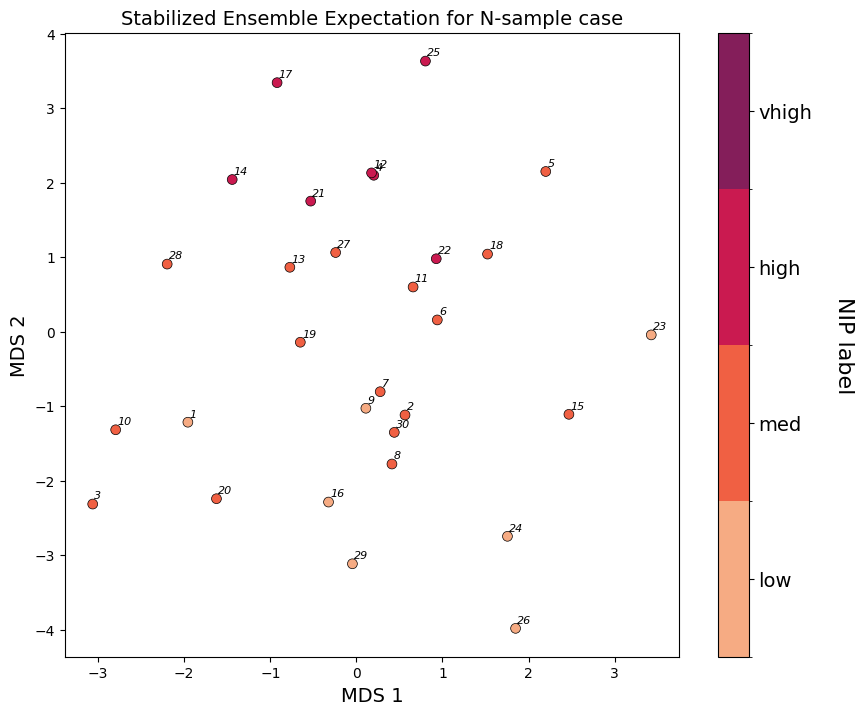

In [40]:
obj2.stabilized_all_plotter(dataframe=df_subset, hue_=response, palette_=1, annotate=True, n_case=True, save=True)

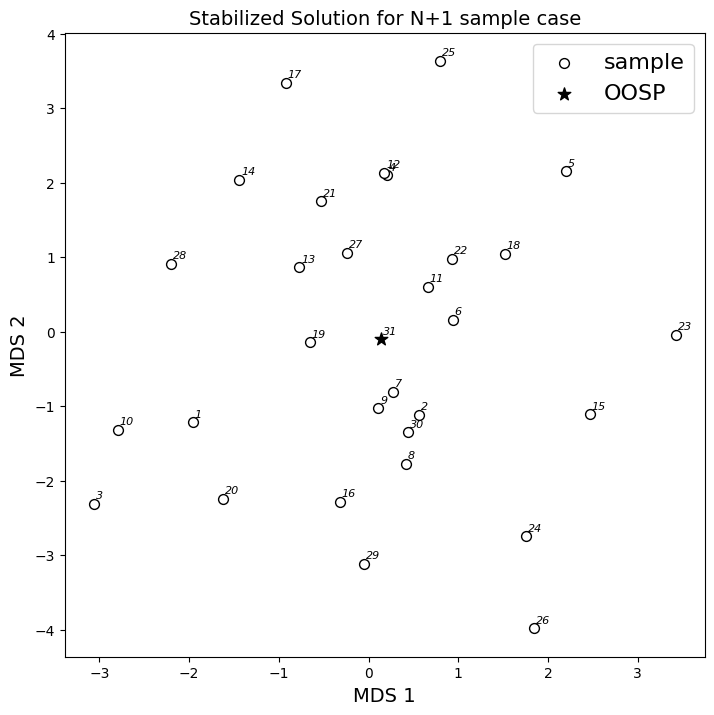

In [41]:
obj2.stable_representation(title='Stabilized Solution for N+1 sample case', Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off)

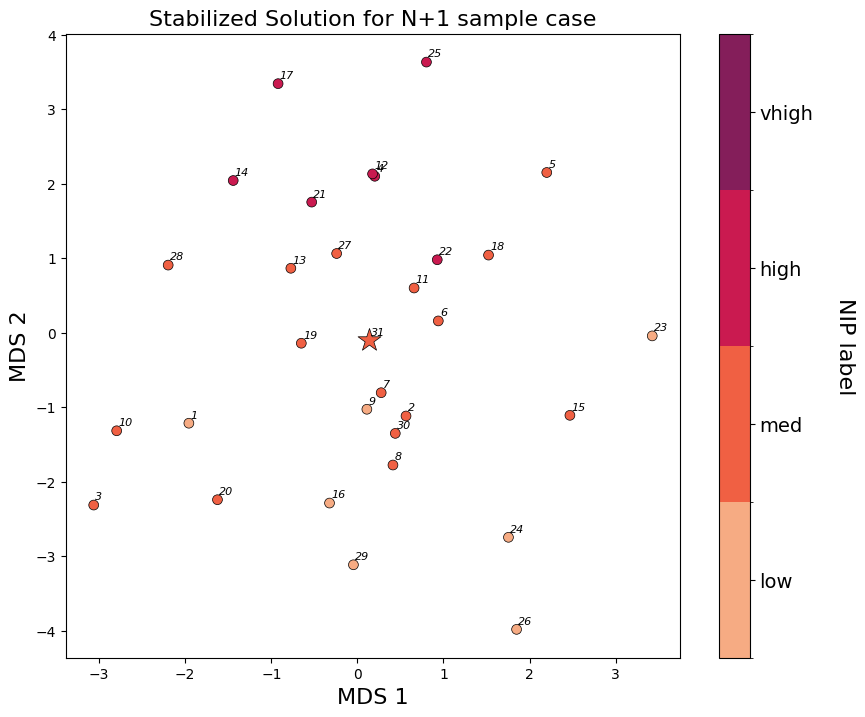

In [42]:
obj2.stabilized_all_plotter(dataframe=df_subset2, hue_=response, palette_=1, annotate=True, n_case=False, save=True)

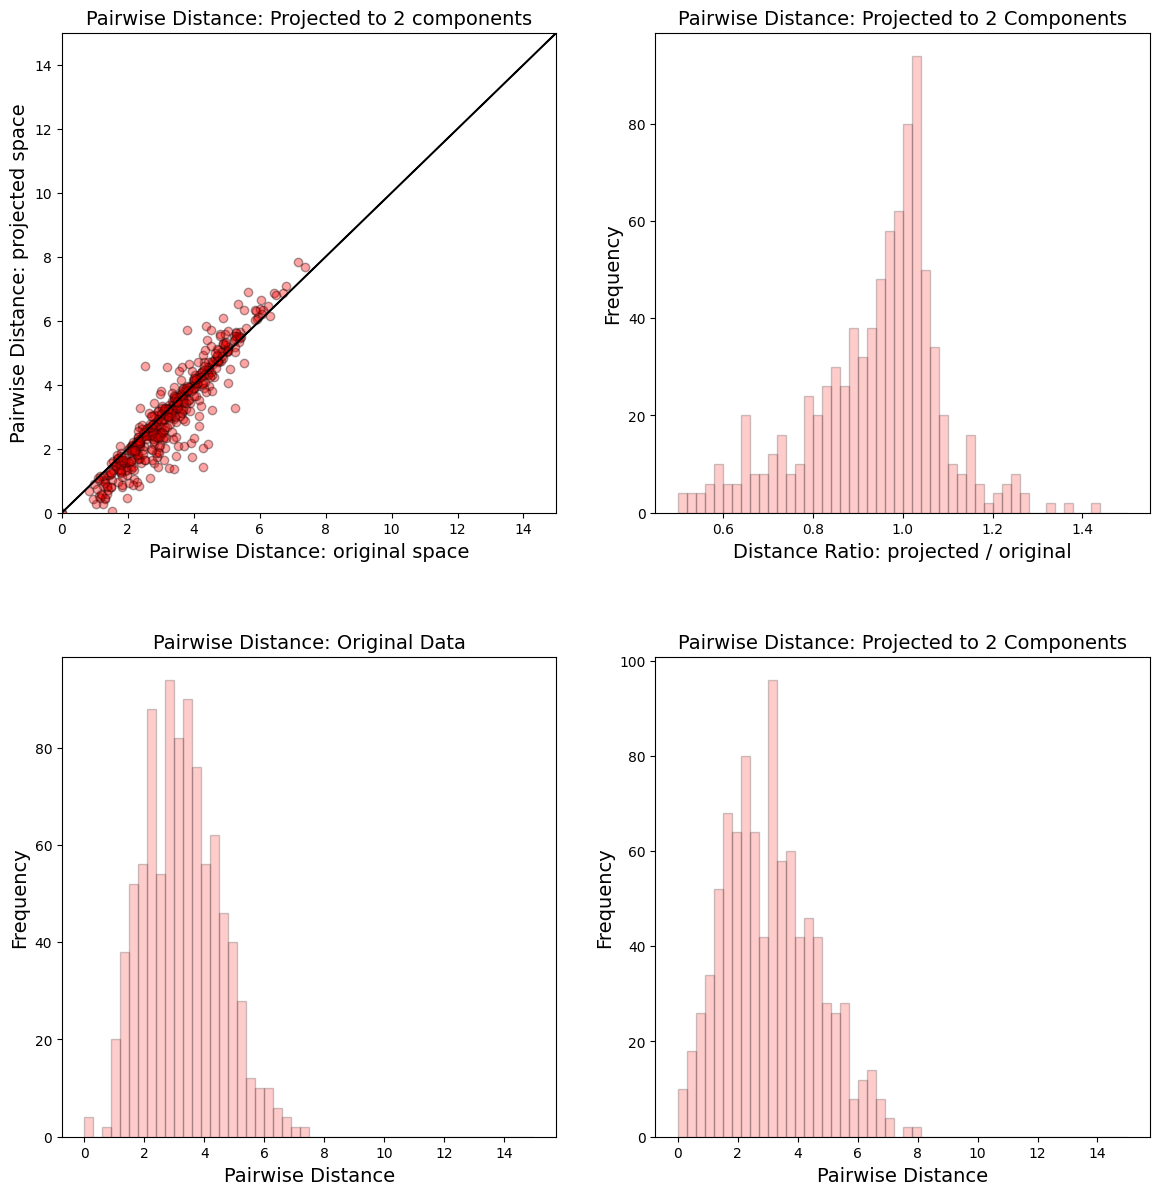

Distance Ratio, mean: 0.9065, standard deviation: 0.2090.


In [43]:
obj2.visual_model_check(norm_type='L2', fig_name='Model check for the stabilized solution of N+1 case samples', array=E2, expectation_compute=True, save=True)

In [44]:
print("The average, minimum, and maximum stress values for the realizations in the n-scenario are ", round(np.mean(norm_stress),5) , round(np.min(norm_stress),5)
      , round(np.max(norm_stress),5))

print("The average, minimum, and maximum stress values for the realizations in the n+1 -scenario are ", round(np.mean(norm_stress2),5) , round(np.min(norm_stress2),5), round(np.max(norm_stress2),5))

print("The stress ratio is ",  round((np.mean(norm_stress2)/np.mean(norm_stress)), 2))

The average, minimum, and maximum stress values for the realizations in the n-scenario are  0.16972 0.1686 0.17643
The average, minimum, and maximum stress values for the realizations in the n+1 -scenario are  0.16905 0.16821 0.17317
The stress ratio is  1.0
